<h2><center></center></h2>
<h1><center><font size=10>Capstone Project 1</center></font></h1>
<h2><center>Credit Card Score Prediction</center></h2>
<center> Multi Classification </center>

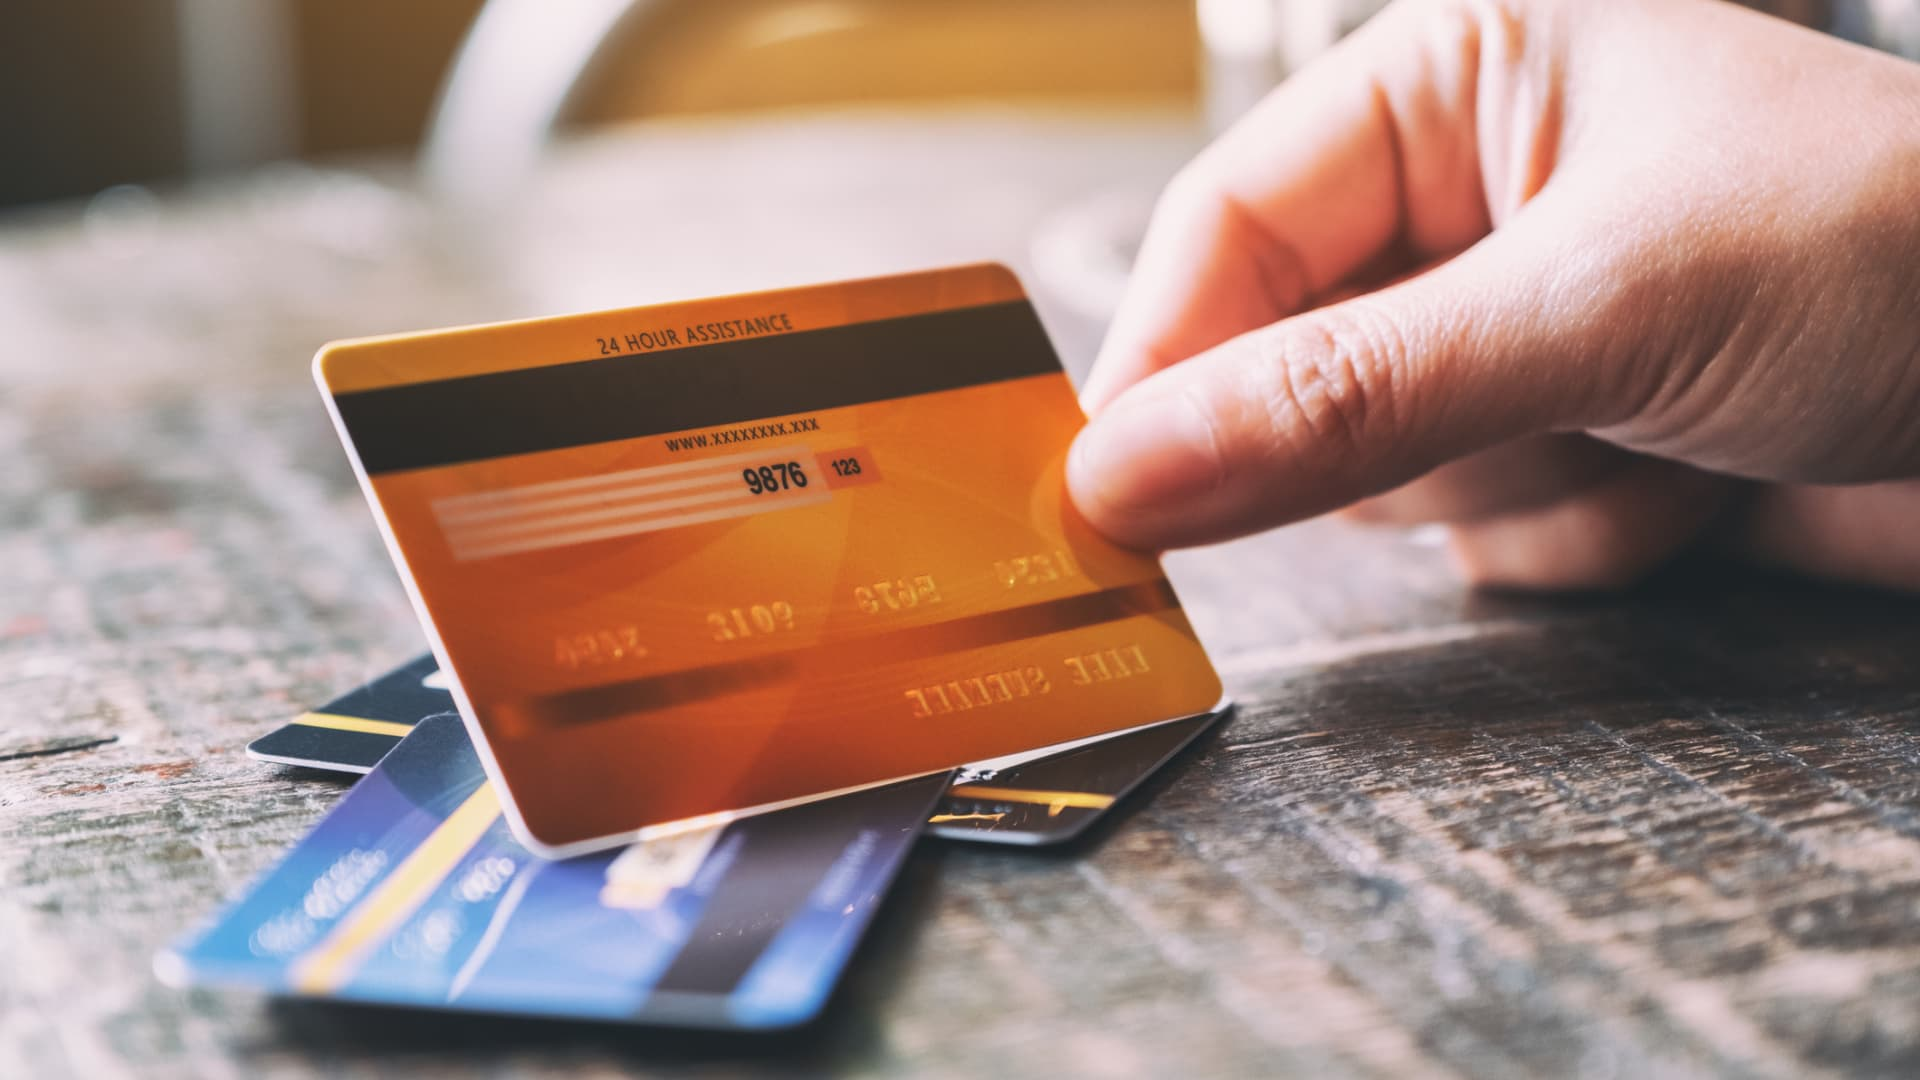

# <font color = "brown"><font size = 5>  **Credit Card Score Prediction** </font>

## <font color = "brown"><font size = 5> **Background:** </font>
Financial institutions face the challenge of evaluating the creditworthiness of individuals applying for credit cards. Accurate credit scoring is crucial for managing risk and ensuring responsible lending practices. In this context, the goal is to develop a machine learning model that can predict the credit card score of an applicant based on various financial and personal factors.

## <font color = "brown"><font size = 5> **Objective:** </font>
The objective of this project is to build a predictive model that classifies credit card applicants into three categories: "Good," "Standard," and "Poor." Each category represents a different level of creditworthiness.

## <font color = "brown"><font size = 5> **Dataset:** </font>
You will be provided with a dataset containing information about credit card applicants, including features such as income, credit history, debt-to-income ratio, employment status, and other relevant financial indicators. The dataset is labeled with the corresponding credit card score categories for model training and evaluation.

The Dataset contains following columns:
- ID: Unique identifier for each record.
- Customer_ID: Unique identifier for each customer.
- Month: The month in which the data was recorded.
- Name: Name of the individual.
- Age: Age of the customer.
- SSN: Social Security Number of the customer.
- Occupation: Occupation of the customer.
- Annual_Income: Annual income of the customer.
- Monthly_Inhand_Salary: Monthly take-home salary of the customer.
- Num_Bank_Accounts: Number of bank accounts held by the customer.
- Num_Credit_Card: Number of credit cards owned by the customer.
- Interest_Rate: Interest rate associated with the credit card.
- Num_of_Loan: Number of loans taken by the customer.
- Type_of_Loan: Type of loan taken by the customer.
- Delay_from_due_date: Delay from the due date for payments.
- Num_of_Delayed_Payment: Number of delayed payments.
- Changed_Credit_Limit: Indicator of whether the credit limit has changed.
- Num_Credit_Inquiries: Number of credit inquiries made by the customer.
- Credit_Mix: Mix of credit types (e.g., credit cards, loans).
- Outstanding_Debt: Amount of outstanding debt.
- Credit_Utilization_Ratio: Ratio of credit used to credit available.
- Credit_History_Age: Age of the customer's credit history.
- Payment_of_Min_Amount: Payment behavior regarding the minimum amount due.
- Total_EMI_per_month: Total Equated Monthly Installment (EMI) payments.
- Amount_invested_monthly: Amount invested by the customer monthly.
- Payment_Behaviour: Behavior regarding payments.
- Monthly_Balance: Monthly balance in the account.
- Credit_Score: The target variable, representing the credit score of the customer.


## <font color = "brown"><font size = 5> **Tasks:** </font>

1. Perform data preprocessing to handle missing values, outliers, and encode categorical variables.
2. Conduct exploratory data analysis to understand the distribution of the target classes and relationships between features.
3. Engineer relevant features to improve model performance.
4. Choose and train machine learning models for credit card score prediction.
5. Evaluate the models using appropriate metrics for multi-class classification.
6. Fine-tune model hyperparameters for optimal performance.
7. Interpret the models to understand the factors influencing credit card scores.

## <font color = "brown"><font size = 5> **Deliverables:** </font>
Deliverables:
The deliverables for this project include a well-documented Jupyter notebook or a report detailing the entire machine learning , from data exploration and preprocessing to model training, evaluation, and interpretation. Additionally, provide insights into the significance of different features and how they contribute to the credit card score prediction.

## <font color = "brown"><font size = 5>**Note:** </font>
Ensure that the model adheres to ethical guidelines and privacy regulations when dealing with sensitive financial data. The success of the project will be measured based on the model's accuracy, precision, recall, and overall performance in predicting credit card scores.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive/ML_Datasets/

/gdrive/My Drive/ML_Datasets


# <font color = "brown"><font size = 5> Import Necessary Library </font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [ ]:
!pip install category_encoders
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,f1_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
# Reading Input data file
data = pd.read_csv('credit_card.csv')
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
# let us make another copy of data
df = data.copy()
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


<font color = "blue" size = 4>Checking the numbers of rows and columns</font>

In [ ]:
df.shape

(100000, 28)

<font color = "blue" size = 4>Lets have a look at column names</font>

In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

<font color = "blue" size = 4>Checking column type and missing values</font>

In [ ]:
#getting all the information of dataset using info command
#info command gives
  #1 No of rows
  #2 No of columns
  #3 No of float,int,object columns
  #4 Datatype of all the columns
  #5 Notnull values of all the columns
  #6 Memory used for storing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### Observation:
* There are 100000 rows and 28 columns.
* There are 8 numeric columns and 20 object columns.
* Many numeric columns have object datatype and we need to fix it.
* Dependent variable are in object datatype

<font color = "blue" size = 4>Lets check the null values</font>

In [ ]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
df.isna().sum()[df.isna().sum()>0]

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

In [ ]:
df.isna().sum()[df.isna().sum()>0].values.sum()

60071

<font color = "blue" size = 4>Checking the unique values</font>

In [ ]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

<br/>
<font color = "brown" size = 5>Statistical Summary</font>

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [ ]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

# <font color = "brown" size = 5>**EDA**</font>
EDA stands for Exploratory Data Analysis. It is an approach to analyzing data sets to summarize their main characteristics, often with the help of statistical graphics and other data visualization methods. The primary goal of EDA is to understand the data's underlying patterns, detect outliers, identify relationships between variables, and gather insights that can guide further analysis or decision-making.

array([[<Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>],
       [<Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>, <Axes: >]],
      dtype=object)

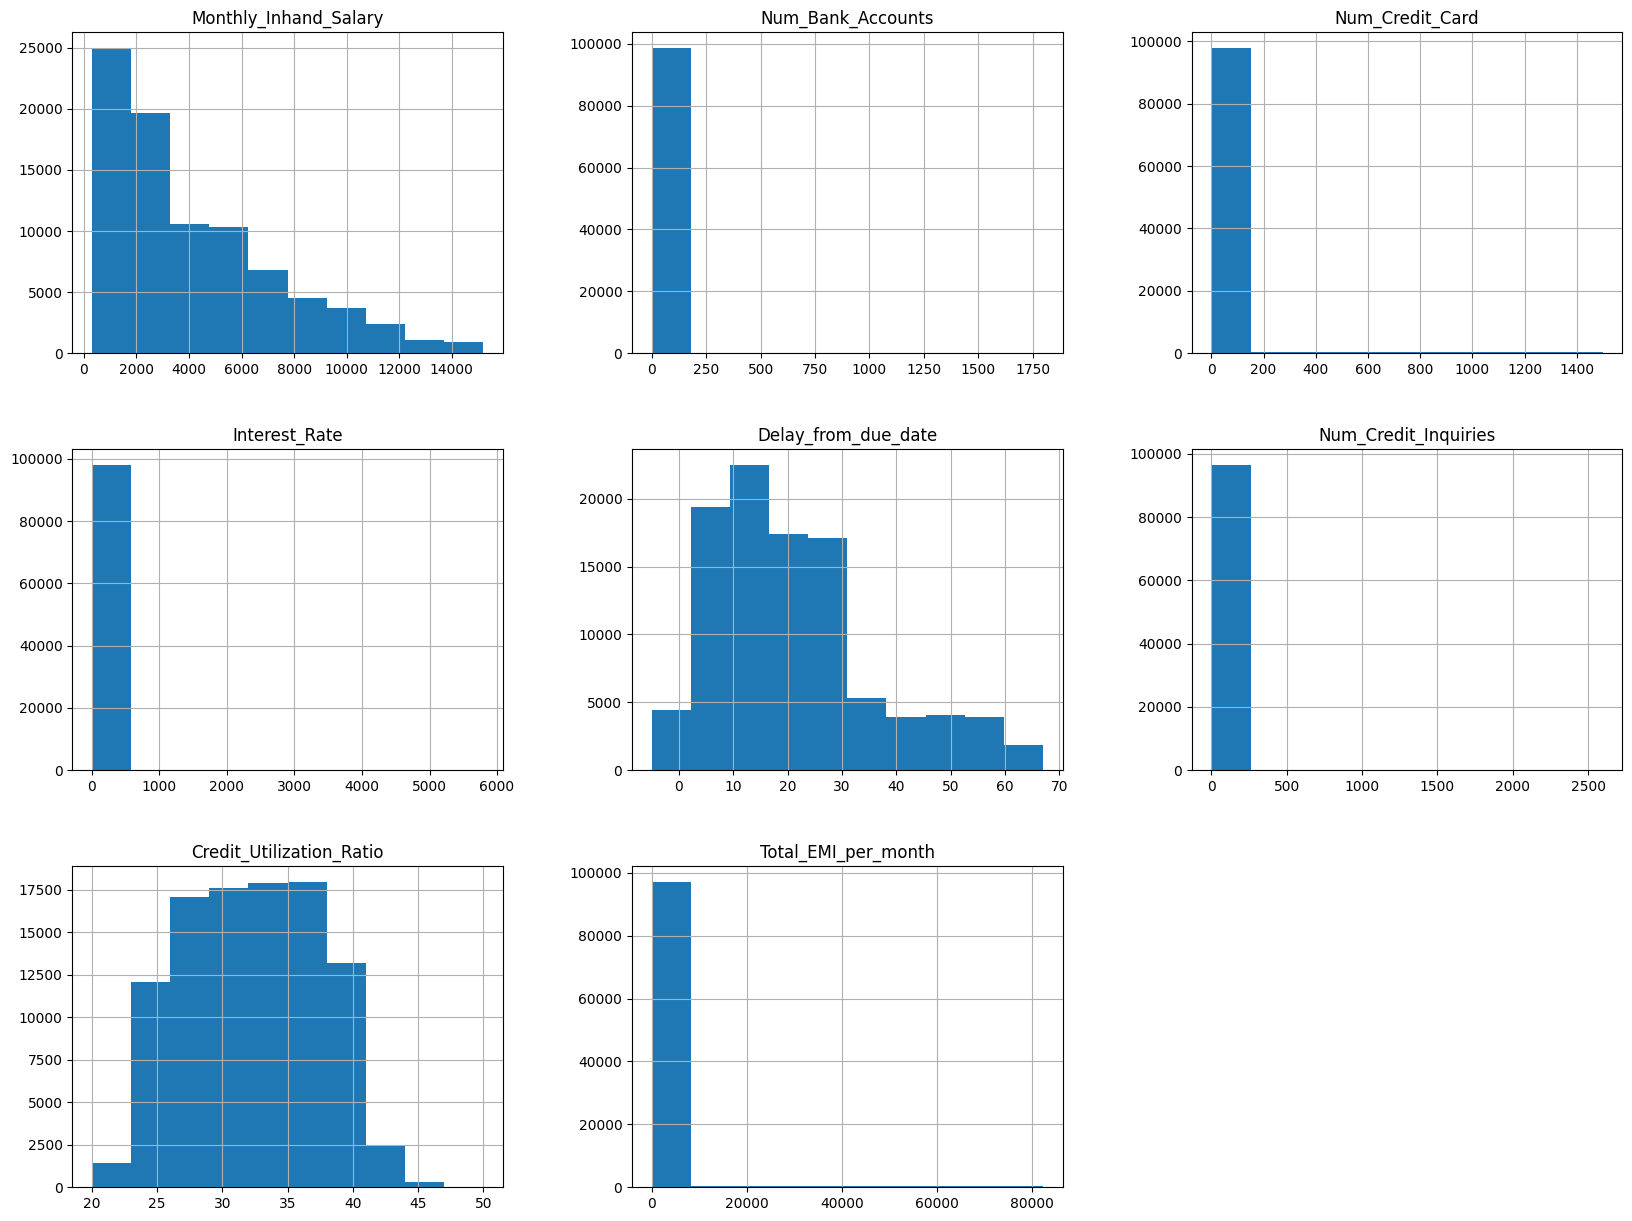

In [ ]:
df.hist(figsize=(20,15))

<Axes: xlabel='Credit_Score', ylabel='count'>

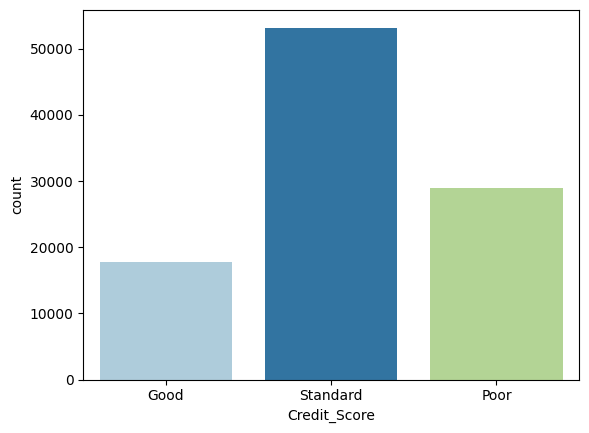

In [ ]:
sns.countplot(data=df,x='Credit_Score',palette='Paired')

###  <font color = "brown" size = 5> **Credit Score Distribution:** </font>
- The graph categorizes individuals into three credit score groups: Good, Standard, and Poor.
- The majority of people fall into the Standard category, as indicated by the tallest blue bar.
- The Good credit score group has the shortest bar, suggesting that fewer individuals have excellent credit.
- The Poor credit score group falls in between, with a moderate number of people.

#### Mapping age which is less than 0 and greater than 100 as 50

In [ ]:
df['Age']=df['Age'].apply(pd.to_numeric,errors="coerce")
df.loc[df['Age'] <= 0, 'Age'] = 50
df.loc[df['Age'] >= 100, 'Age'] = 50

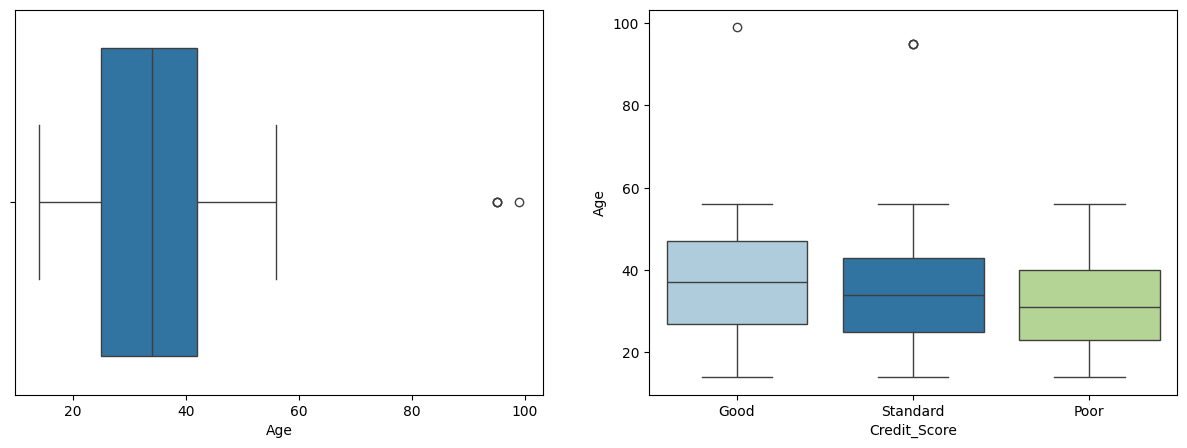

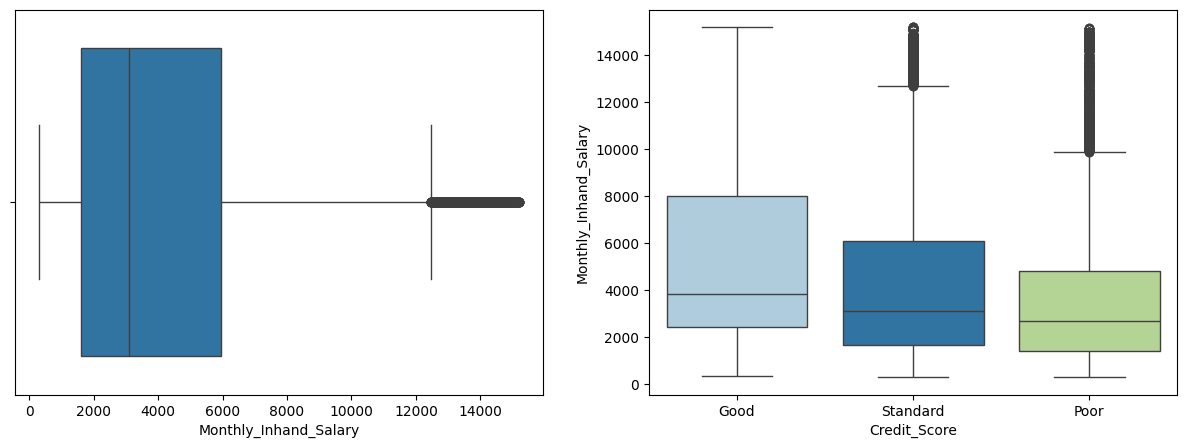

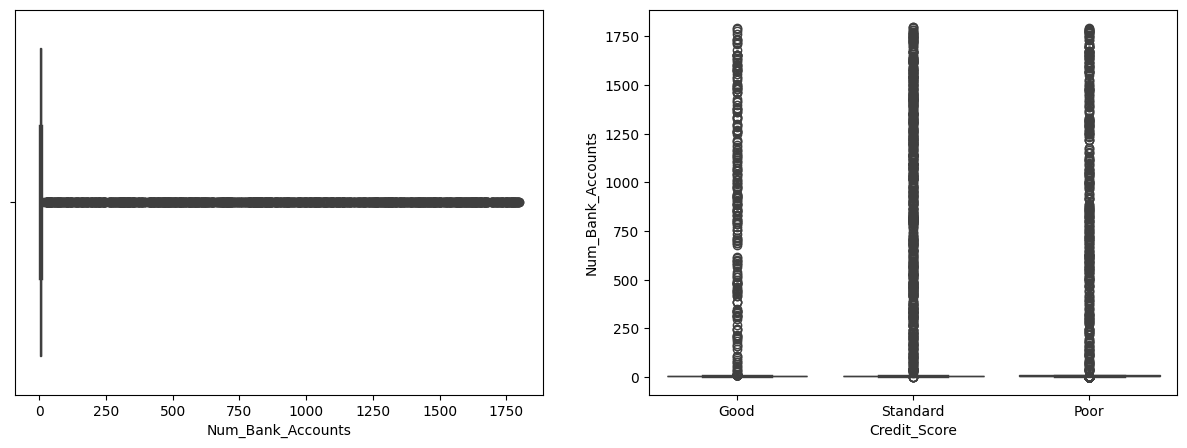

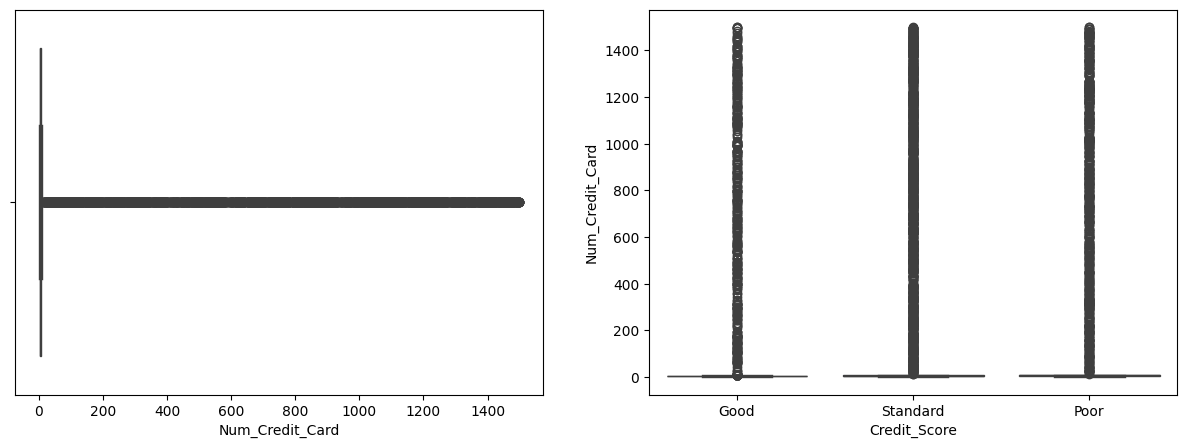

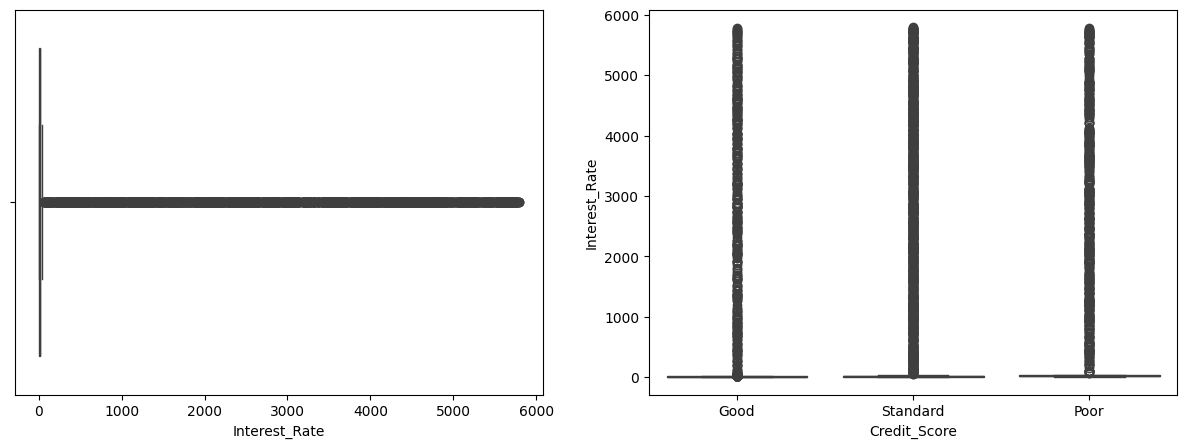

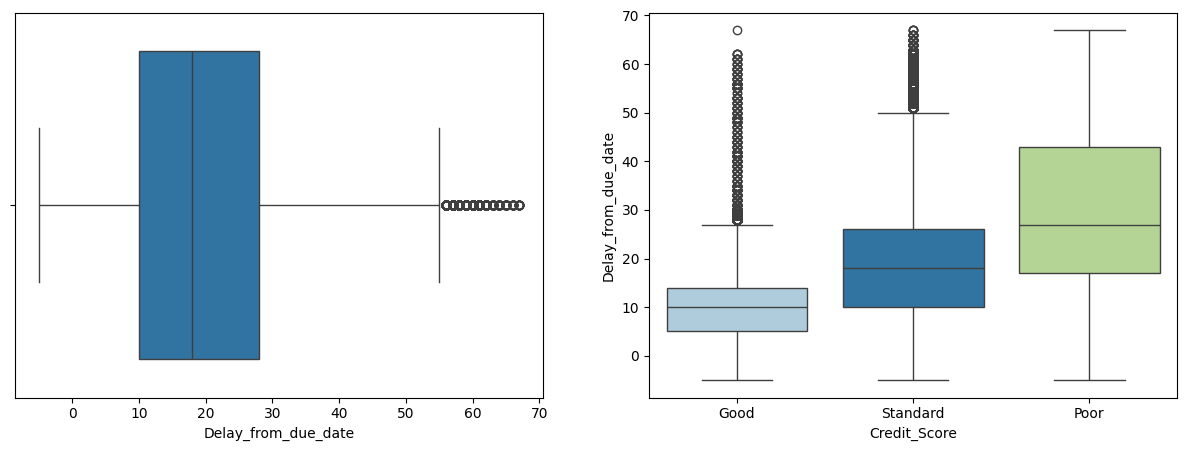

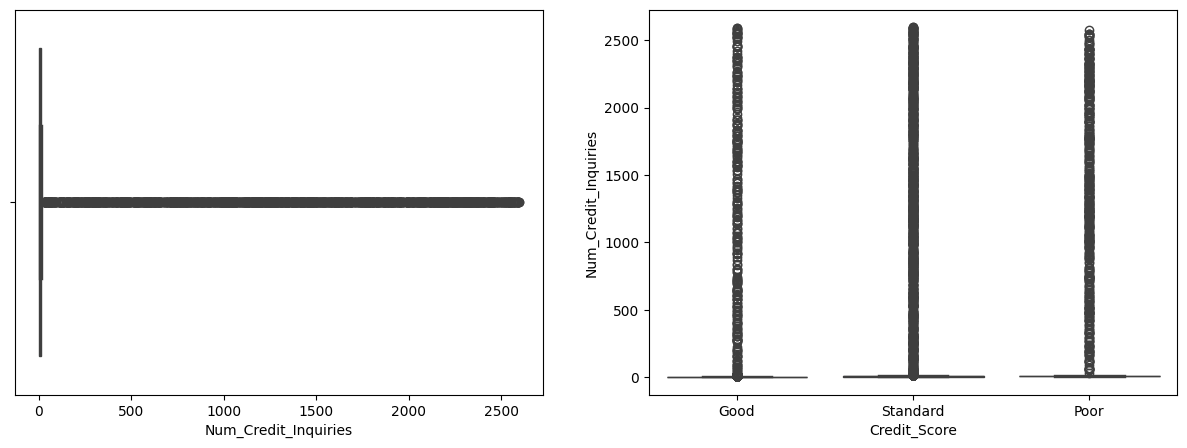

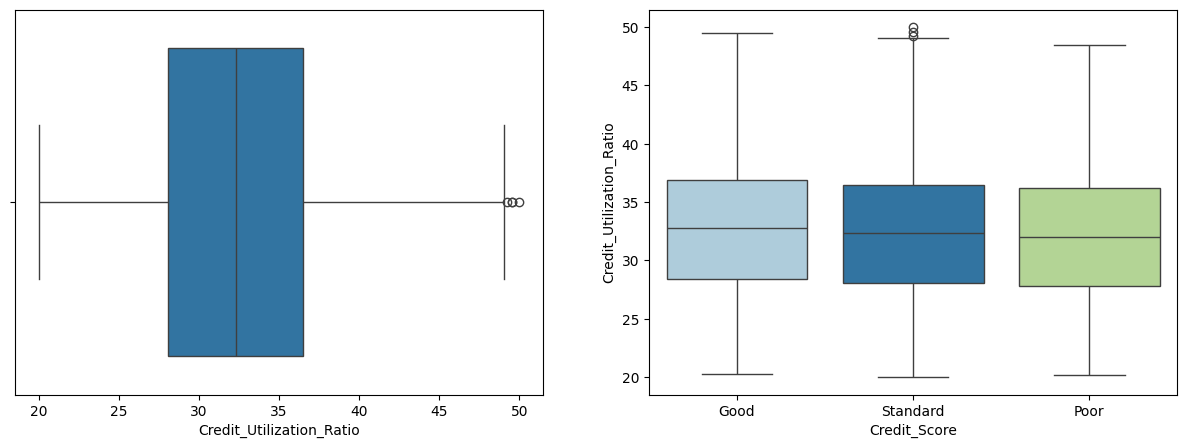

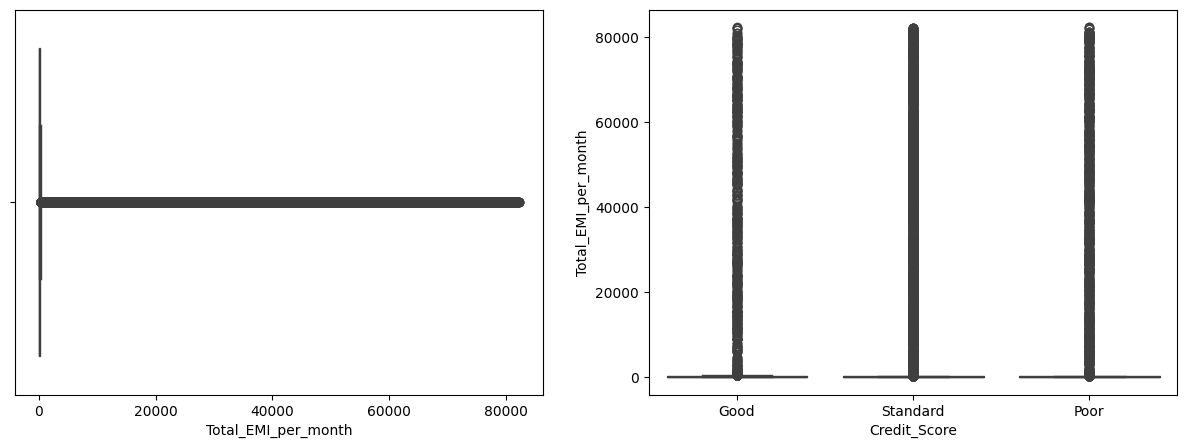

In [ ]:
for col in df.select_dtypes(include = np.number):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(x=col, data =df)
    plt.subplot(1,2,2)
    sns.boxplot(x='Credit_Score',y=col, data =df,palette='Paired')
    plt.show()

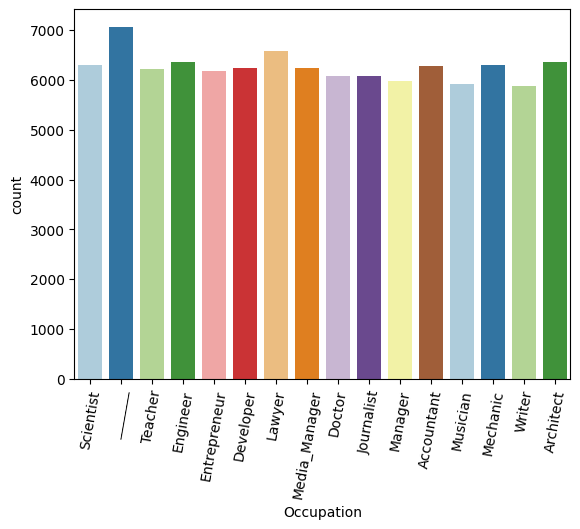

In [ ]:
sns.countplot(x=df["Occupation"],palette='Paired')
plt.xticks(rotation=80)
plt.show()

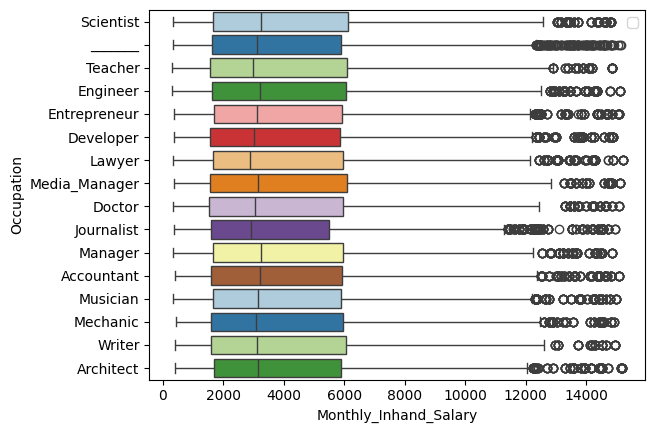

In [ ]:
sns.boxplot(df,y="Occupation",x="Monthly_Inhand_Salary",palette='Paired')
plt.legend()
plt.show()

### <font color = "brown" size = 5>**Observations:** </font>
- Scientist and Lawyer have the highest salaries, with their bars extending significantly.
- Engineers, Developers, and Doctors also enjoy substantial salaries.
- Journalists, Musicians, and Writers receive comparatively lower salaries.
- Accountants, Managers, and Media Managers fall in the mid-range.
### <font color = "brown" size = 5> **Insights:** </font>
- Salary Disparities: The graph highlights significant disparities in salaries across professions.
- Career Choices: Aspiring professionals can use this data to make informed career choices based on financial considerations.
- Industry Trends: It's essential to explore industry-specific trends and demand when selecting a career path.
- Negotiation Strategies: Understanding salary ranges can empower individuals during job negotiations

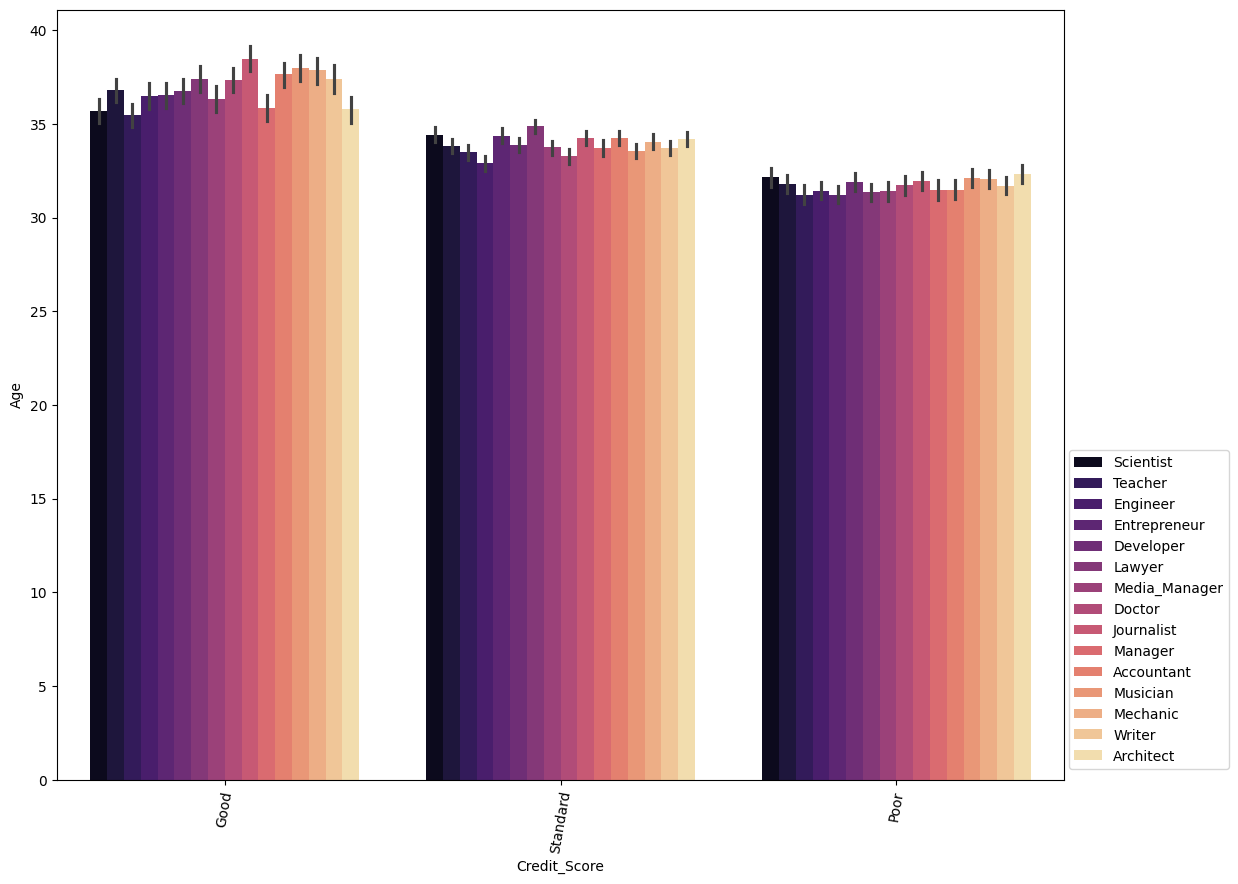

In [ ]:
plt.figure(figsize=(13,10))
sns.barplot(df,x='Credit_Score',y='Age', hue="Occupation",palette="magma", linewidth=3)
plt.xticks(rotation=80)
plt.legend(loc="right",bbox_to_anchor=(0.67, 0., 0.5, 0.442))
plt.show()

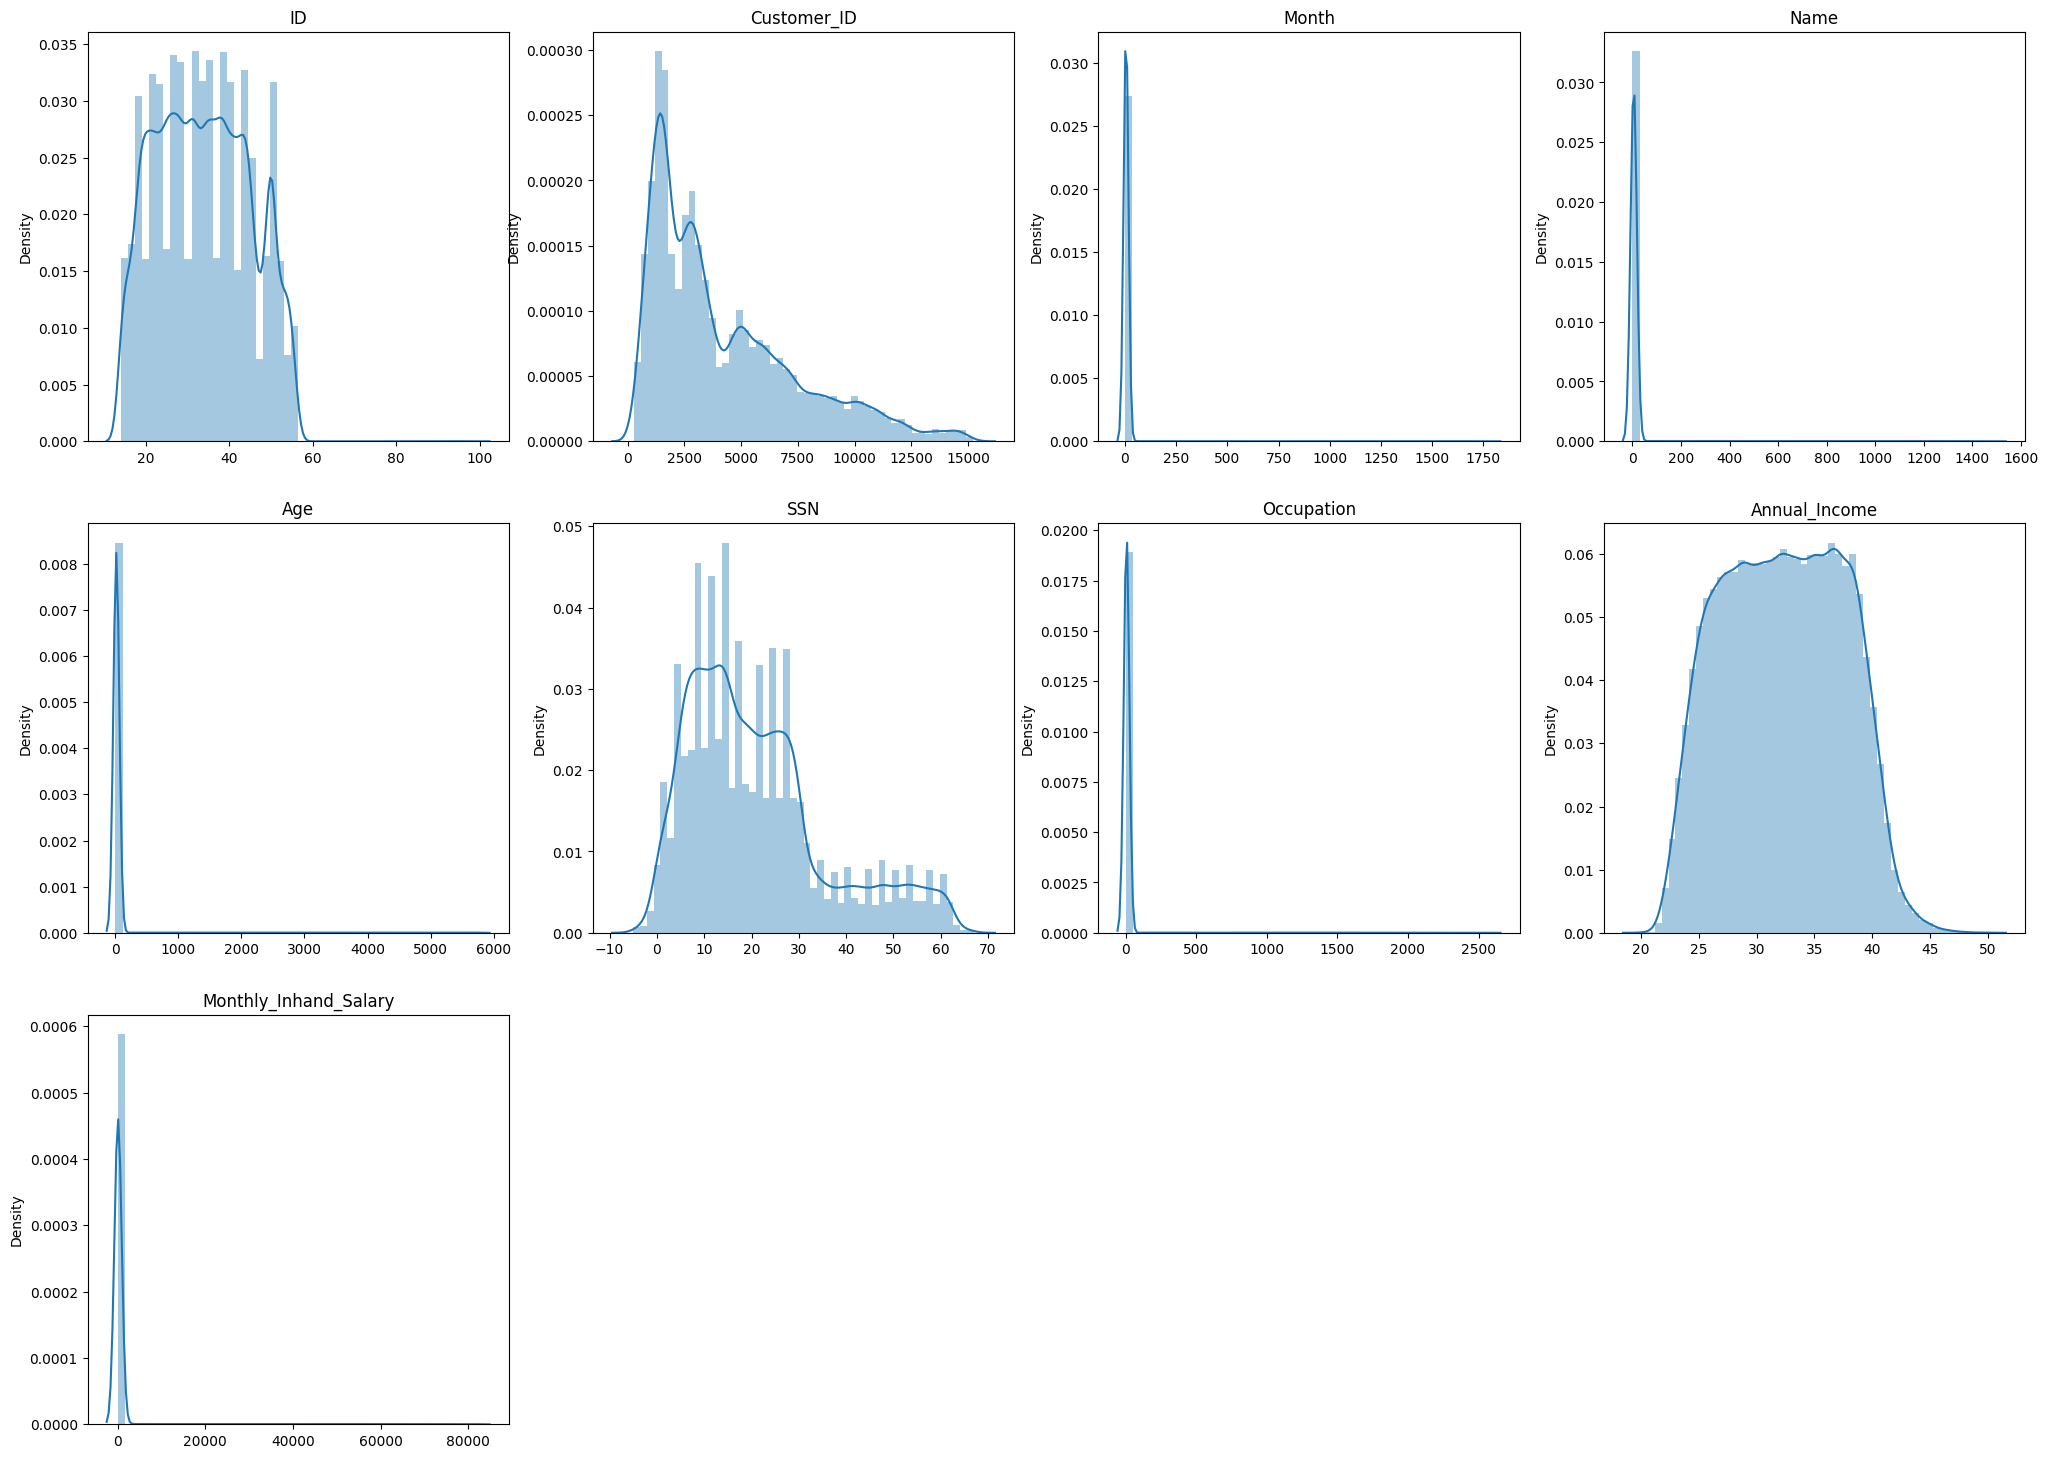

In [ ]:
num_col = df.select_dtypes(include = 'number')
plt.figure(figsize=(25,50))
for i in range (0 , num_col.shape[1]):
    plt.subplot(8,4,i+1)
    sns.distplot(x=num_col.iloc[:,i])
    plt.title(df.columns[i])

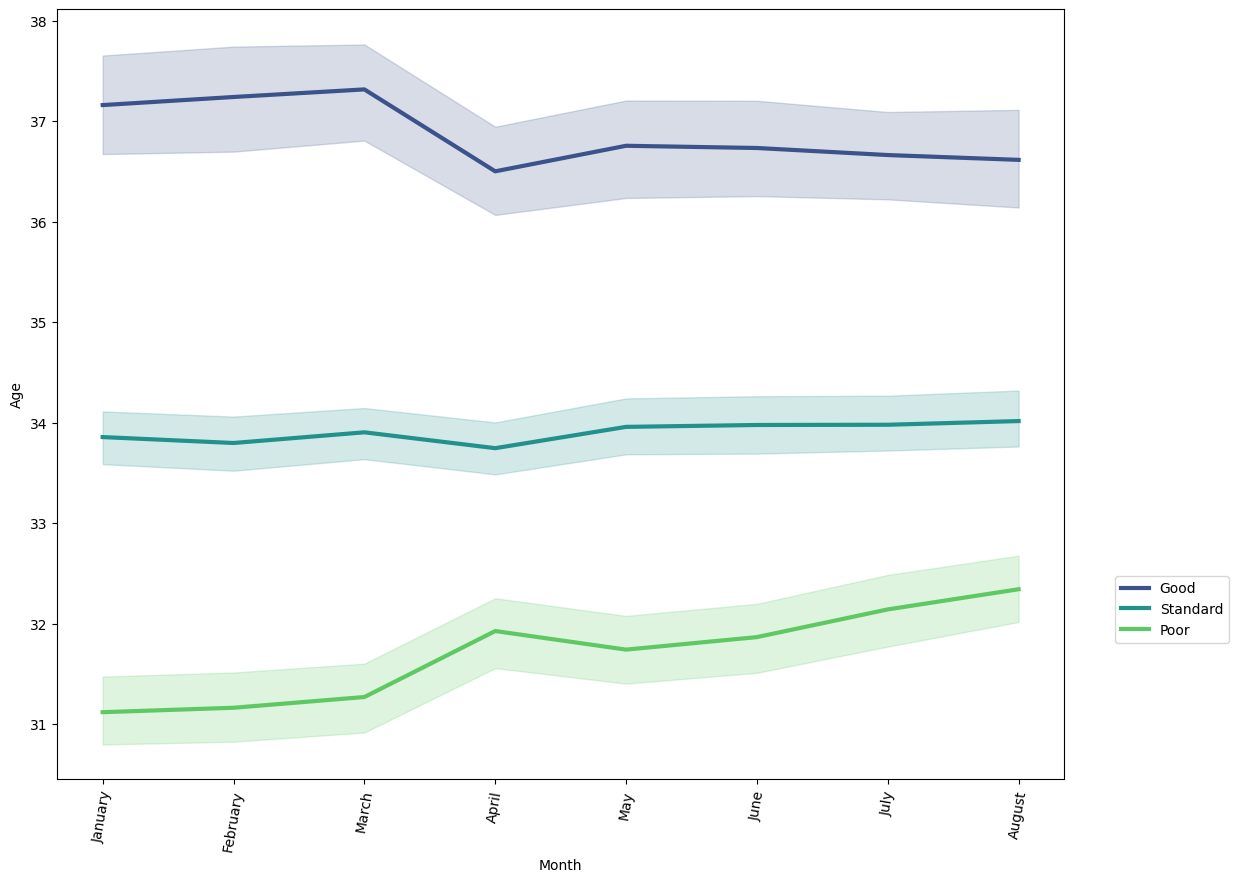

In [ ]:
plt.figure(figsize=(13,10))
sns.lineplot(df,x='Month',y='Age', hue="Credit_Score",palette="viridis", linewidth=3)
plt.xticks(rotation=80)
plt.legend(loc="right",bbox_to_anchor=(0.67, 0., 0.5, 0.442))
plt.show()

<font color = "blue" size = 4>Lets look at outliers of every numerical column </font>

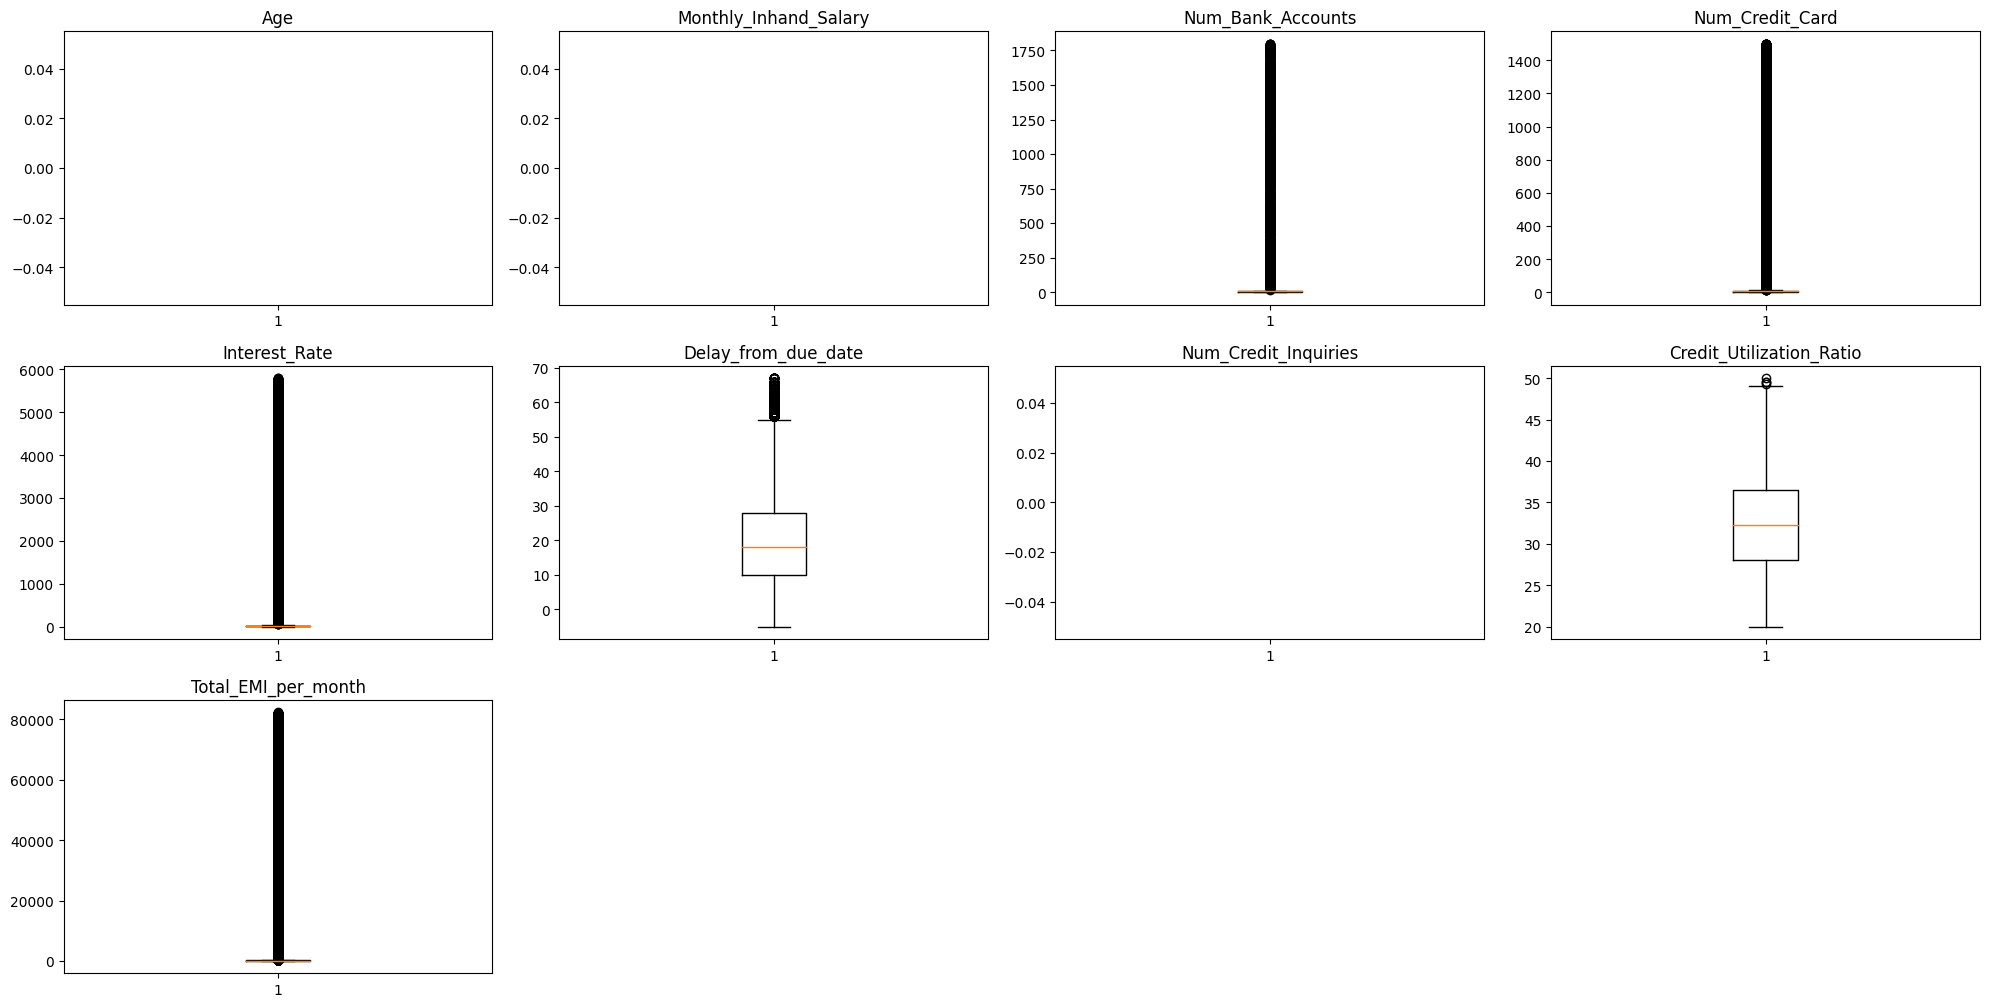

In [ ]:
#outlier detection using boxplot
all_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))
for i ,variable in enumerate(all_col):
  plt.subplot(9,4,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

We are not treating outlier it is very sensitive to our model. Because we have a Bank data every data point or rows plays a crusial role for our model.

Text(0.5, 1.0, 'Correlation Heatmap of Factors')

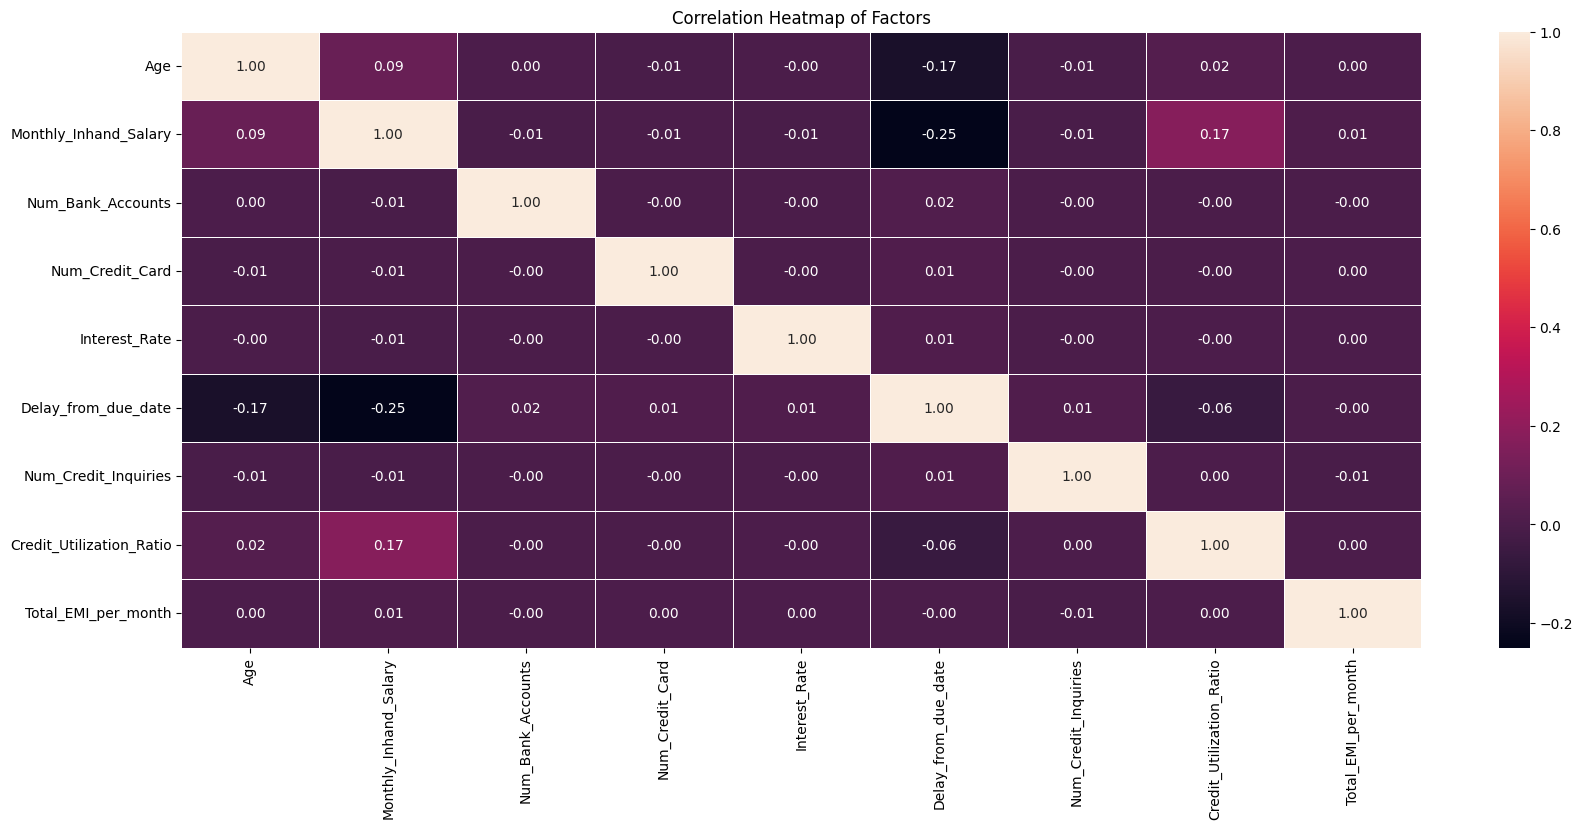

In [ ]:
selected_columns = df.select_dtypes(include=['number'])

correlation_matrix = selected_columns.corr()


plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Factors')

## **Observation**
There is no strong correlation between features

# <font color = "brown" size = 5> **Data Preprocessing** </font>

In [ ]:
occ_val = df['Occupation'].value_counts().reset_index()
occ_val

,index,Occupation
0,_______,7062
1,Lawyer,6575
2,Architect,6355
3,Engineer,6350
4,Scientist,6299
5,Mechanic,6291
6,Accountant,6271
7,Developer,6235
8,Media_Manager,6232
9,Teacher,6215


### Removing unnecessary characters  from columns

In [ ]:
df['Annual_Income']=df.Annual_Income.str.replace('_','')
df['Num_of_Loan']=df.Num_of_Loan.str.replace('_','')
df['Num_of_Delayed_Payment']=df.Num_of_Delayed_Payment.str.replace('_','')
df['Changed_Credit_Limit']=df.Changed_Credit_Limit.replace('_',np.NAN)
df['Outstanding_Debt']=df.Outstanding_Debt.str.replace('_','')
df['Amount_invested_monthly']=df.Amount_invested_monthly.str.replace('_','')
df['Monthly_Balance']=df.Monthly_Balance.str.replace('_','')
df['Age'] = df.Age.replace('-',"")
# df['Age'] = df.Age.str.replace('_',"")

In [ ]:
# Replace _______ to other in Occupation column
df.Occupation.replace('_______','Other',inplace=True)

In [ ]:
# df.loc[df['Num_of_Loan'] < 0, 'Num_of_Loan'] = 3
# df.loc[df['Num_of_Loan'] > 10, 'Num_of_Loan'] = 3

In [ ]:
# Mapping dependent variable as  0,1,2
df['Credit_Score'] = df['Credit_Score'].map({'Good':0,'Standard':1,'Poor':2})

In [ ]:
df.Credit_Score.value_counts()/len(df.Credit_Score)*100

1    53.174
2    28.998
0    17.828
Name: Credit_Score, dtype: float64

## **Label Encoding vs One Hot Encoding vs Target Encoding**

**Label Encoding:**

Label encoding involves assigning a unique integer to each category in a categorical variable. It is suitable for ordinal variables where there is a meaningful order among the categories.

**One-Hot Encoding:**

One-hot encoding creates binary columns for each category in a categorical variable. Each column represents the presence or absence of the corresponding category.

**Mean Encoding (Target Encoding):**

Mean encoding involves replacing categorical values with the mean (or another summary statistic) of the target variable for each category.

Here we use Mean Encoding(Target Encoding) <br>
**Reason:**
- Captures relationships between categorical variables and the target variable.
- Can be effective for high-cardinality categorical variables.

In [ ]:
columns2 =['Annual_Income','Age','Num_Credit_Card','Interest_Rate','Delay_from_due_date','Num_of_Delayed_Payment','Monthly_Balance',
                           'Num_Credit_Inquiries','Changed_Credit_Limit','Credit_History_Age','Payment_of_Min_Amount','Payment_Behaviour','Occupation','Credit_Mix',
                           'Outstanding_Debt','Total_EMI_per_month',]
for item in columns2:
    mean_encoding = df.groupby([item])['Credit_Score'].mean()
    df[item] = df[item].map(mean_encoding)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,1.128498,821-00-0265,1.126052,0.125,1824.843333,3,...,1.111265,0.125,26.822620,0.848039,0.750498,0.125,80.41529543900253,1.085891,0.0,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,1.128498,821-00-0265,1.126052,0.125,NaN,3,...,0.670707,0.125,31.944960,NaN,0.750498,0.125,118.28022162236736,1.100815,0.0,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,0.995638,821-00-0265,1.126052,0.125,NaN,3,...,0.670707,0.125,28.609352,0.789256,0.750498,0.125,81.699521264648,1.124738,0.0,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,1.128498,821-00-0265,1.126052,0.125,NaN,3,...,0.670707,0.125,31.377862,0.780488,0.750498,0.125,199.4580743910713,1.229373,0.0,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,1.128498,821-00-0265,1.126052,0.125,1824.843333,3,...,0.670707,0.125,24.797347,0.771429,0.750498,0.125,41.420153086217326,1.052166,0.0,0


In [ ]:
df.drop('Type_of_Loan',axis=1,inplace=True)

In [ ]:
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'SSN', 'Amount_invested_monthly','Name','Annual_Income','Num_of_Loan','Outstanding_Debt']
df.drop(columns=columns_to_drop,axis=1, inplace=True)

## <font color = "brown" size = 5> Creating Dependent and Independent variable </font>

In [ ]:
# df.drop(['Name','Annual_Income','Num_of_Loan','Outstanding_Debt'],axis=1,inplace=True)
X=df.drop('Credit_Score',axis=1)
y = df.Credit_Score

In [ ]:
X.columns

Index(['Age', 'Occupation', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [ ]:
X.shape

(100000, 17)

In [ ]:
# sns.distplot(X)

In [ ]:
X.isna().sum()[X.isna().sum() > 0]

Age                        4939
Monthly_Inhand_Salary     15002
Num_of_Delayed_Payment     7002
Changed_Credit_Limit       2091
Num_Credit_Inquiries       1965
Credit_History_Age         9030
Monthly_Balance            2868
dtype: int64

#<font color = "brown" size = 5> **Splitting Data** </font>

### **Data Leakage**
Data Leakage is the scenario where the Machine Learning Model is already aware of some part of test data after training. <br> This causes the problem of overfitting.<br>
Solution is Splitting the data in Train-Validation-Test Formate where Data is splitting twice.

## Train-test split twice

* First split - splitting the orignal dataset.
* Training set for experiments in further section
* Testing set for final model performance
---
* Second split - Splitting the training data
* Training set for further experimet
* Testing set(validation set) for the evaluation of model during experiment(Not the final model)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# First Split
X_tem_train,X_final_test,y_tem_train,y_final_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Check shape of split
print('X_tem_train',X_tem_train.shape)
print('X_final_test',X_final_test.shape)
print('y_tem_train',y_tem_train.shape)
print('y_final_test',y_final_test.shape)

X_tem_train (70000, 17)
X_final_test (30000, 17)
y_tem_train (70000,)
y_final_test (30000,)


In [ ]:
# Second Split

X_train,X_test,y_train,y_test = train_test_split(X_tem_train,y_tem_train,test_size=0.3,random_state=1)

# Check shape of split
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (49000, 17)
X_test (21000, 17)
y_train (49000,)
y_test (21000,)


### Simple Imputer
* **Handling Missing Data**: Simple Imputer is a tool in sklearn that helps handle missing data in your dataset.
* **Replacement Strategy**: It works by replacing missing values in the dataset with a specified value,such as a mean,median,most frequent value or a constant.
* **Ease of Use**:It is easy to use and can be applied to both numerical and categorical data.
* **Applicability**: SimplieImputer is often used as a preprocessing step in ml pipelines to ensure that the datasets does not contains any missing values before training a model.
* **Default Strategy**:If no streatgy is specified ,SimpleImputer defaults to using the mean straetgy for numerical data and the most frequent strategy for categorical data.
* **Uniform Replacement**: SimpleImputer replaces all missing valuess in the dataset with the same value which is determined based on th specified strategy.

In [ ]:
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_final_test_imputed = imputer.fit_transform(X_final_test)

# <font color = "brown" size = 5> **Model Building** </font>

## **Accuracy matrics use to check the performance of model**

**Precision:**

Precision, also known as positive predictive value, measures the accuracy of the positive predictions made by the model. It is calculated as the ratio of true positive predictions to the sum of true positives and false positives.
Precision = True Positives / (True Positives + False Positives)
A high precision indicates that when the model predicts a positive outcome, it is likely to be correct.

**Recall:**

Recall, also called sensitivity or true positive rate, evaluates the model's ability to capture all the relevant positive instances. It is calculated as the ratio of true positive predictions to the sum of true positives and false negatives.
Recall = True Positives / (True Positives + False Negatives)
A high recall indicates that the model is good at identifying most of the positive instances, minimizing false negatives

# **Lets start from Logistic Regression**

In [ ]:
# Function to make confusion matrix

def make_confusion_matrix(model, y_actual, labels=[0, 1, 2]):
    """
    Creates a confusion matrix to visualize the performance of a classification model.

    Args:
        model: The trained classifier model.
        X_data: The input data used for prediction.
        y_actual: The ground truth labels.
        labels: The list of labels to use in the confusion matrix (optional).

    Returns:
        A pandas DataFrame representing the confusion matrix.
    """

    y_predict = model.predict(X_train_imputed)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=labels)

    df_cm = pd.DataFrame(cm, index=labels, columns=labels)

    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(len(labels)//len(labels), len(labels))
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()



In [ ]:
# Function to check recall and precison score

def get_recall_precision(model):
  '''
  model: classifier to predict values of X

  '''

  pred_train = model.predict(X_train_imputed)  # Predict on training set
  pred_test = model.predict(X_test_imputed)  # Predict on test set

  print("Accuracy on training set: ", metrics.accuracy_score(y_train, pred_train))
  print("Accuracy on test set: ", metrics.accuracy_score(y_test, pred_test))
  print("Recall on training set: ", metrics.recall_score(y_train, pred_train,average='weighted'))
  print("Recall on test set: ", metrics.recall_score(y_test, pred_test,average='weighted'))
  print("Precision on training set: ", metrics.precision_score(y_train, pred_train,average='weighted'))
  print("Precision on test set: ", metrics.precision_score(y_test, pred_test,average='weighted'))
  print("F1-score on training set: ", metrics.f1_score(y_train, pred_train,average='weighted'))
  print("F1-score on test set: ", metrics.f1_score(y_test, pred_test,average='weighted'))


In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_imputed, y_train)

train_predictions = logistic_model.predict(X_train_imputed)
test_predictions = logistic_model.predict(X_test_imputed)

train_accuracy = accuracy_score(train_predictions, y_train)
test_accuracy = accuracy_score(test_predictions, y_test)


In [ ]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score
pr_train = logistic_model.predict(X_train_imputed)
pr_test = logistic_model.predict(X_test_imputed)
print('recall of train: ',recall_score(y_train,pr_train,average='weighted'))
print('recall of test: ', recall_score(y_test,pr_test,average= 'weighted'))
print('Precision of train: ',precision_score(y_train,pr_train,average= 'weighted'))
print('precision of test: ',precision_score(y_test,pr_test,average= 'weighted'))
print('Accuracy of test: ',metrics.accuracy_score(y_test,pr_test))
print('F1 of test: ',metrics.f1_score(y_test,pr_test,average= 'weighted'))

recall of train:  0.5308163265306123
recall of test:  0.5326190476190477
Precision of train:  0.3651773141921525
precision of test:  0.3763467219832995
Accuracy of test:  0.5326190476190477
F1 of test:  0.3725188407031964


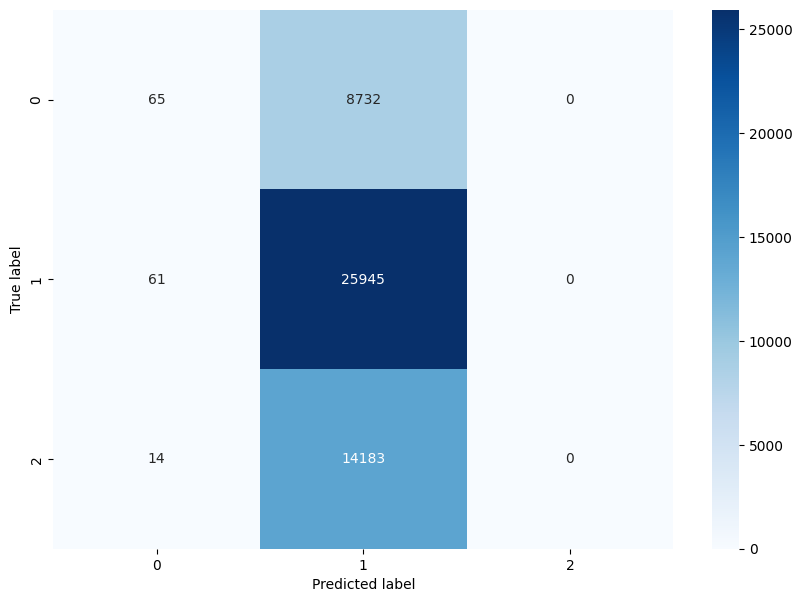

In [ ]:
make_confusion_matrix(logistic_model,y_train)

In [ ]:
get_recall_precision(logistic_model)

Accuracy on training set:  0.5308163265306123
Accuracy on test set:  0.5326190476190477
Recall on training set:  0.5308163265306123
Recall on test set:  0.5326190476190477
Precision on training set:  0.3651773141921525
Precision on test set:  0.3763467219832995
F1-score on training set:  0.37046637804322097
F1-score on test set:  0.3725188407031964


In [ ]:
pred_final_test = logistic_model.predict(X_final_test_imputed)
print('recall of train: ',recall_score(y_train,pr_train,average='weighted'))
print('recall of test: ', recall_score(y_final_test,pred_final_test,average= 'weighted'))
print('Precision of train: ',precision_score(y_train,pr_train,average= 'weighted'))
print('precision of test: ',precision_score(y_final_test,pred_final_test,average= 'weighted'))

recall of train:  0.5308163265306123
recall of test:  0.5333
Precision of train:  0.3651773141921525
precision of test:  0.3740331745615709


## **Observation:**

* Out of 12501 0s model predict 65 correct 0s
* Out of 20315 1s model predict 25945 correct 1s
* Out of 37184 2s model predict 0 correct 2s
* Model is not Performing good on both train and test data based on recall score.


# **Lets check for decision tree**

In [ ]:
# Some Important Library required for classification and Performance of model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [ ]:
model = DecisionTreeClassifier(random_state=1)

In [ ]:
model.fit(X_train_imputed, y_train)

DecisionTreeClassifier(random_state=1)

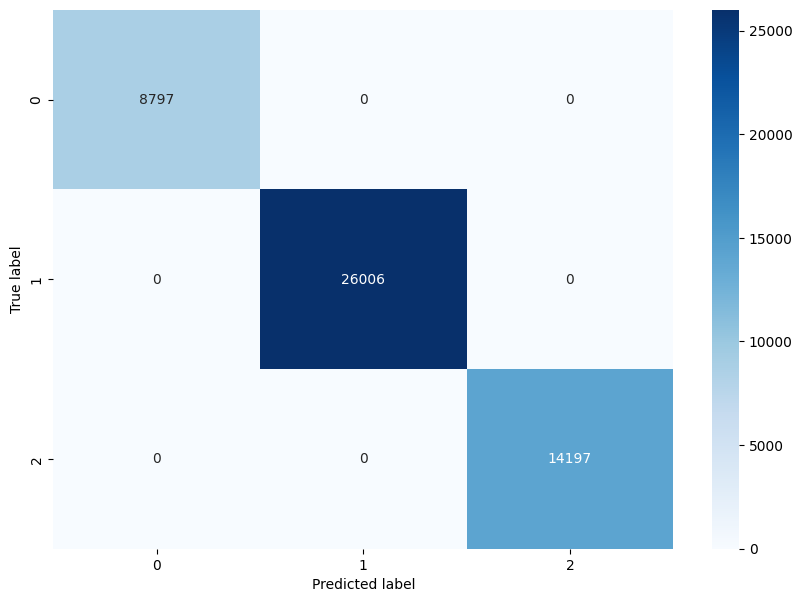

In [ ]:
make_confusion_matrix(model,y_train)

In [ ]:
get_recall_precision(model)

Accuracy on training set:  1.0
Accuracy on test set:  0.9858571428571429
Recall on training set:  1.0
Recall on test set:  0.9858571428571429
Precision on training set:  1.0
Precision on test set:  0.9858591849314239
F1-score on training set:  1.0
F1-score on test set:  0.9858571861209628


* Model is preforming good on both train and test data
* Its seens that model is over train because it capture every point in traninig data

# Visualize tree

In [ ]:
feature_names = X.columns

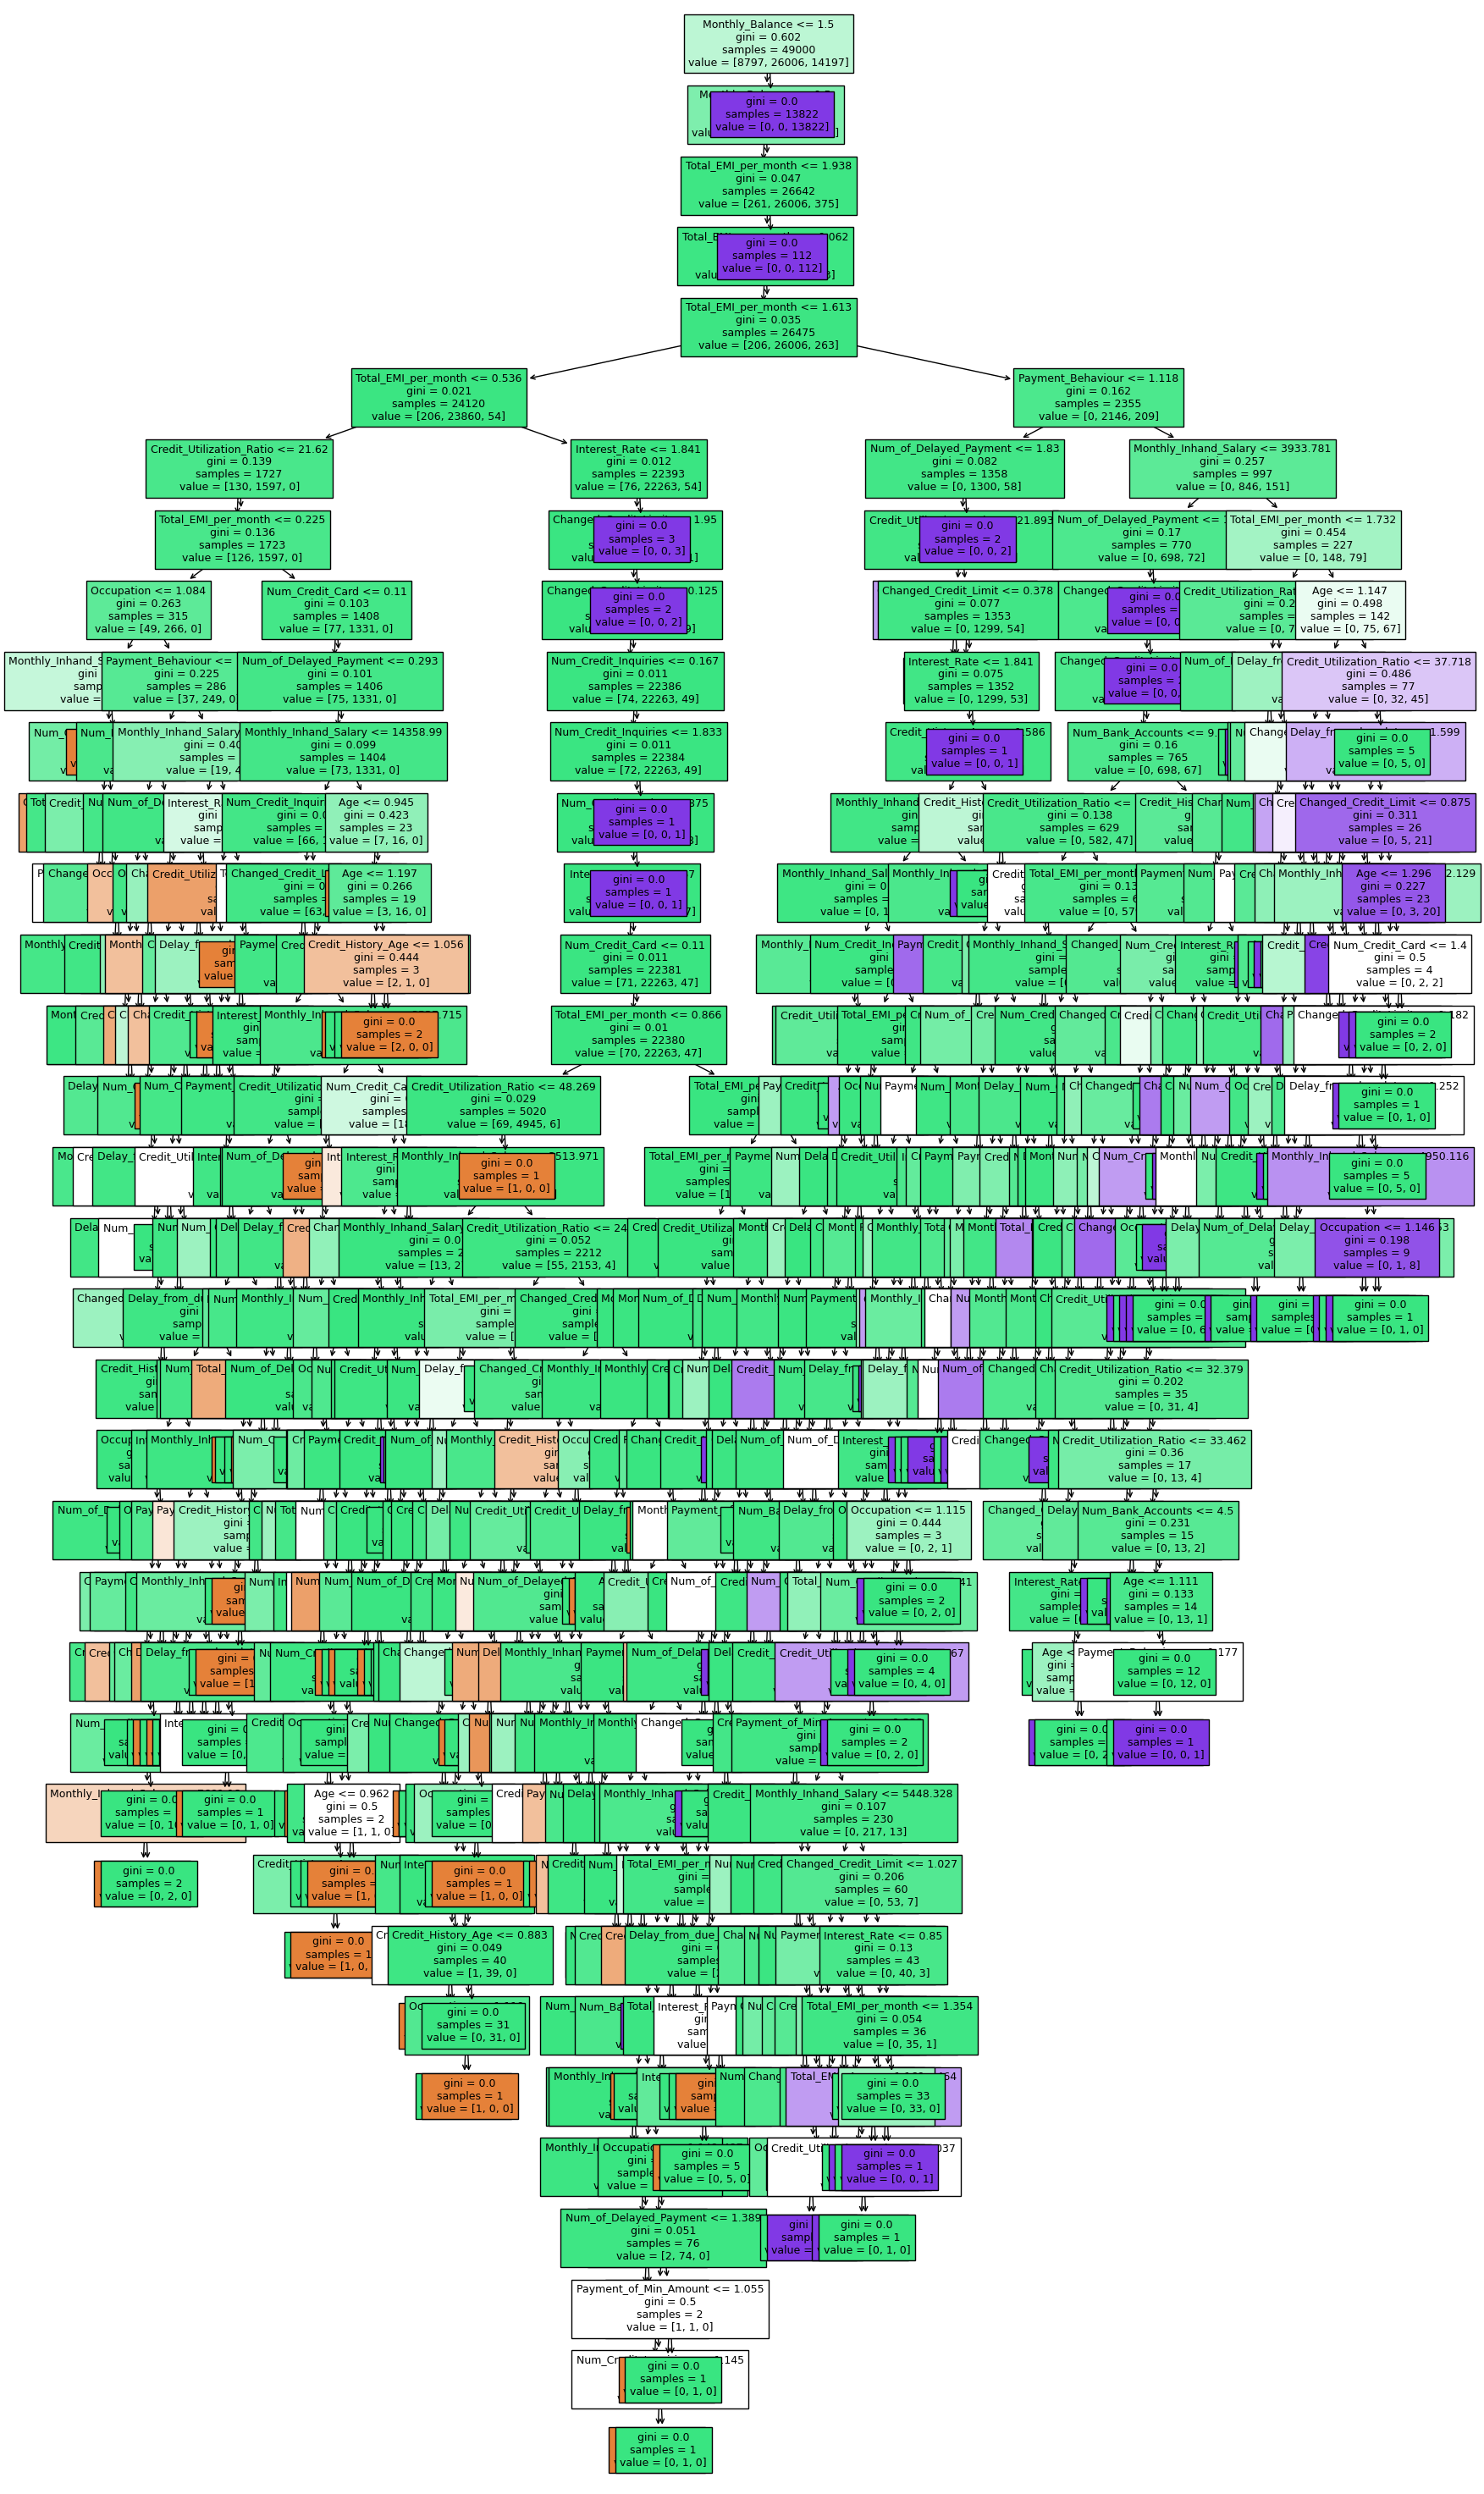

In [ ]:
feature_names = X.columns
plt.figure(figsize=(20,38))
out = tree.plot_tree(model,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()


## **Pre- Prunning**
Using pre-pruning method for hyper parameter tunning using grid or randomized search for better result

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(1, 10),
    'criterion': ['entropy', 'gini'],
    'splitter': ['best', 'random'],
    'min_impurity_decrease': [0.000001, 0.00001, 0.0001],
    'max_features': ['log2', 'sqrt']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the Randomize serch search
grid_obj = RandomizedSearchCV(estimator, parameters, scoring=scorer,n_iter=50, cv=5)
grid_obj = grid_obj.fit(X_train_imputed, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.                                 I
estimator.fit(X_train_imputed, y_train)



DecisionTreeClassifier(max_depth=1, max_features='log2',
                       min_impurity_decrease=0.0001, random_state=1,
                       splitter='random')

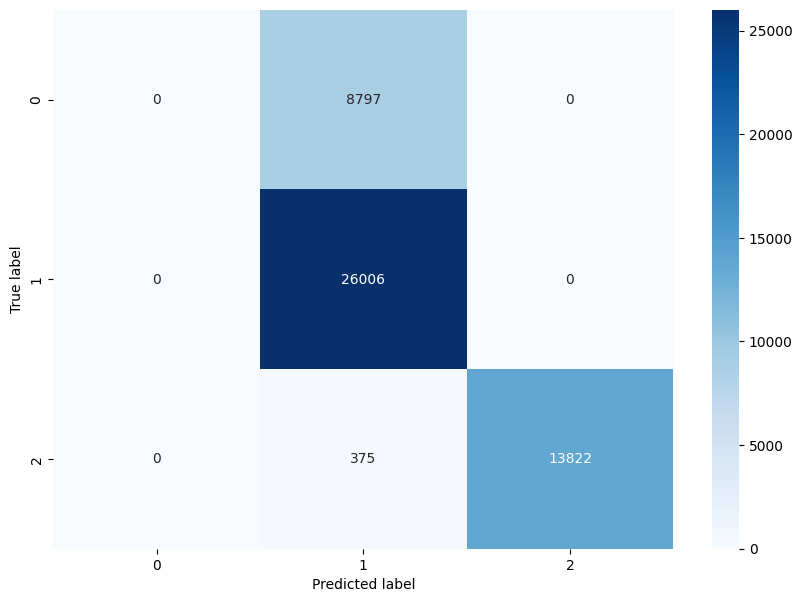

In [ ]:
make_confusion_matrix(estimator,y_train)

In [ ]:
get_recall_precision(estimator)

Accuracy on training set:  0.8128163265306122
Accuracy on test set:  0.8155714285714286
Recall on training set:  0.8128163265306122
Recall on test set:  0.8155714285714286
Precision on training set:  0.6820903266303964
Precision on test set:  0.686648575794679
F1-score on training set:  0.7370300162940465
F1-score on test set:  0.7409410507189177


In [ ]:
Decision_tune_imp_feature =pd.DataFrame({'Columns': X.columns,'Imortant_Feature': estimator.feature_importances_}).sort_values('Imortant_Feature',ascending=False).reset_index()
Decision_tune_imp_feature

,index,Columns,Imortant_Feature
0,16,Monthly_Balance,1.0
1,9,Num_Credit_Inquiries,0.0
2,15,Payment_Behaviour,0.0
3,14,Total_EMI_per_month,0.0
4,13,Payment_of_Min_Amount,0.0
5,12,Credit_History_Age,0.0
6,11,Credit_Utilization_Ratio,0.0
7,10,Credit_Mix,0.0
8,0,Age,0.0
9,1,Occupation,0.0


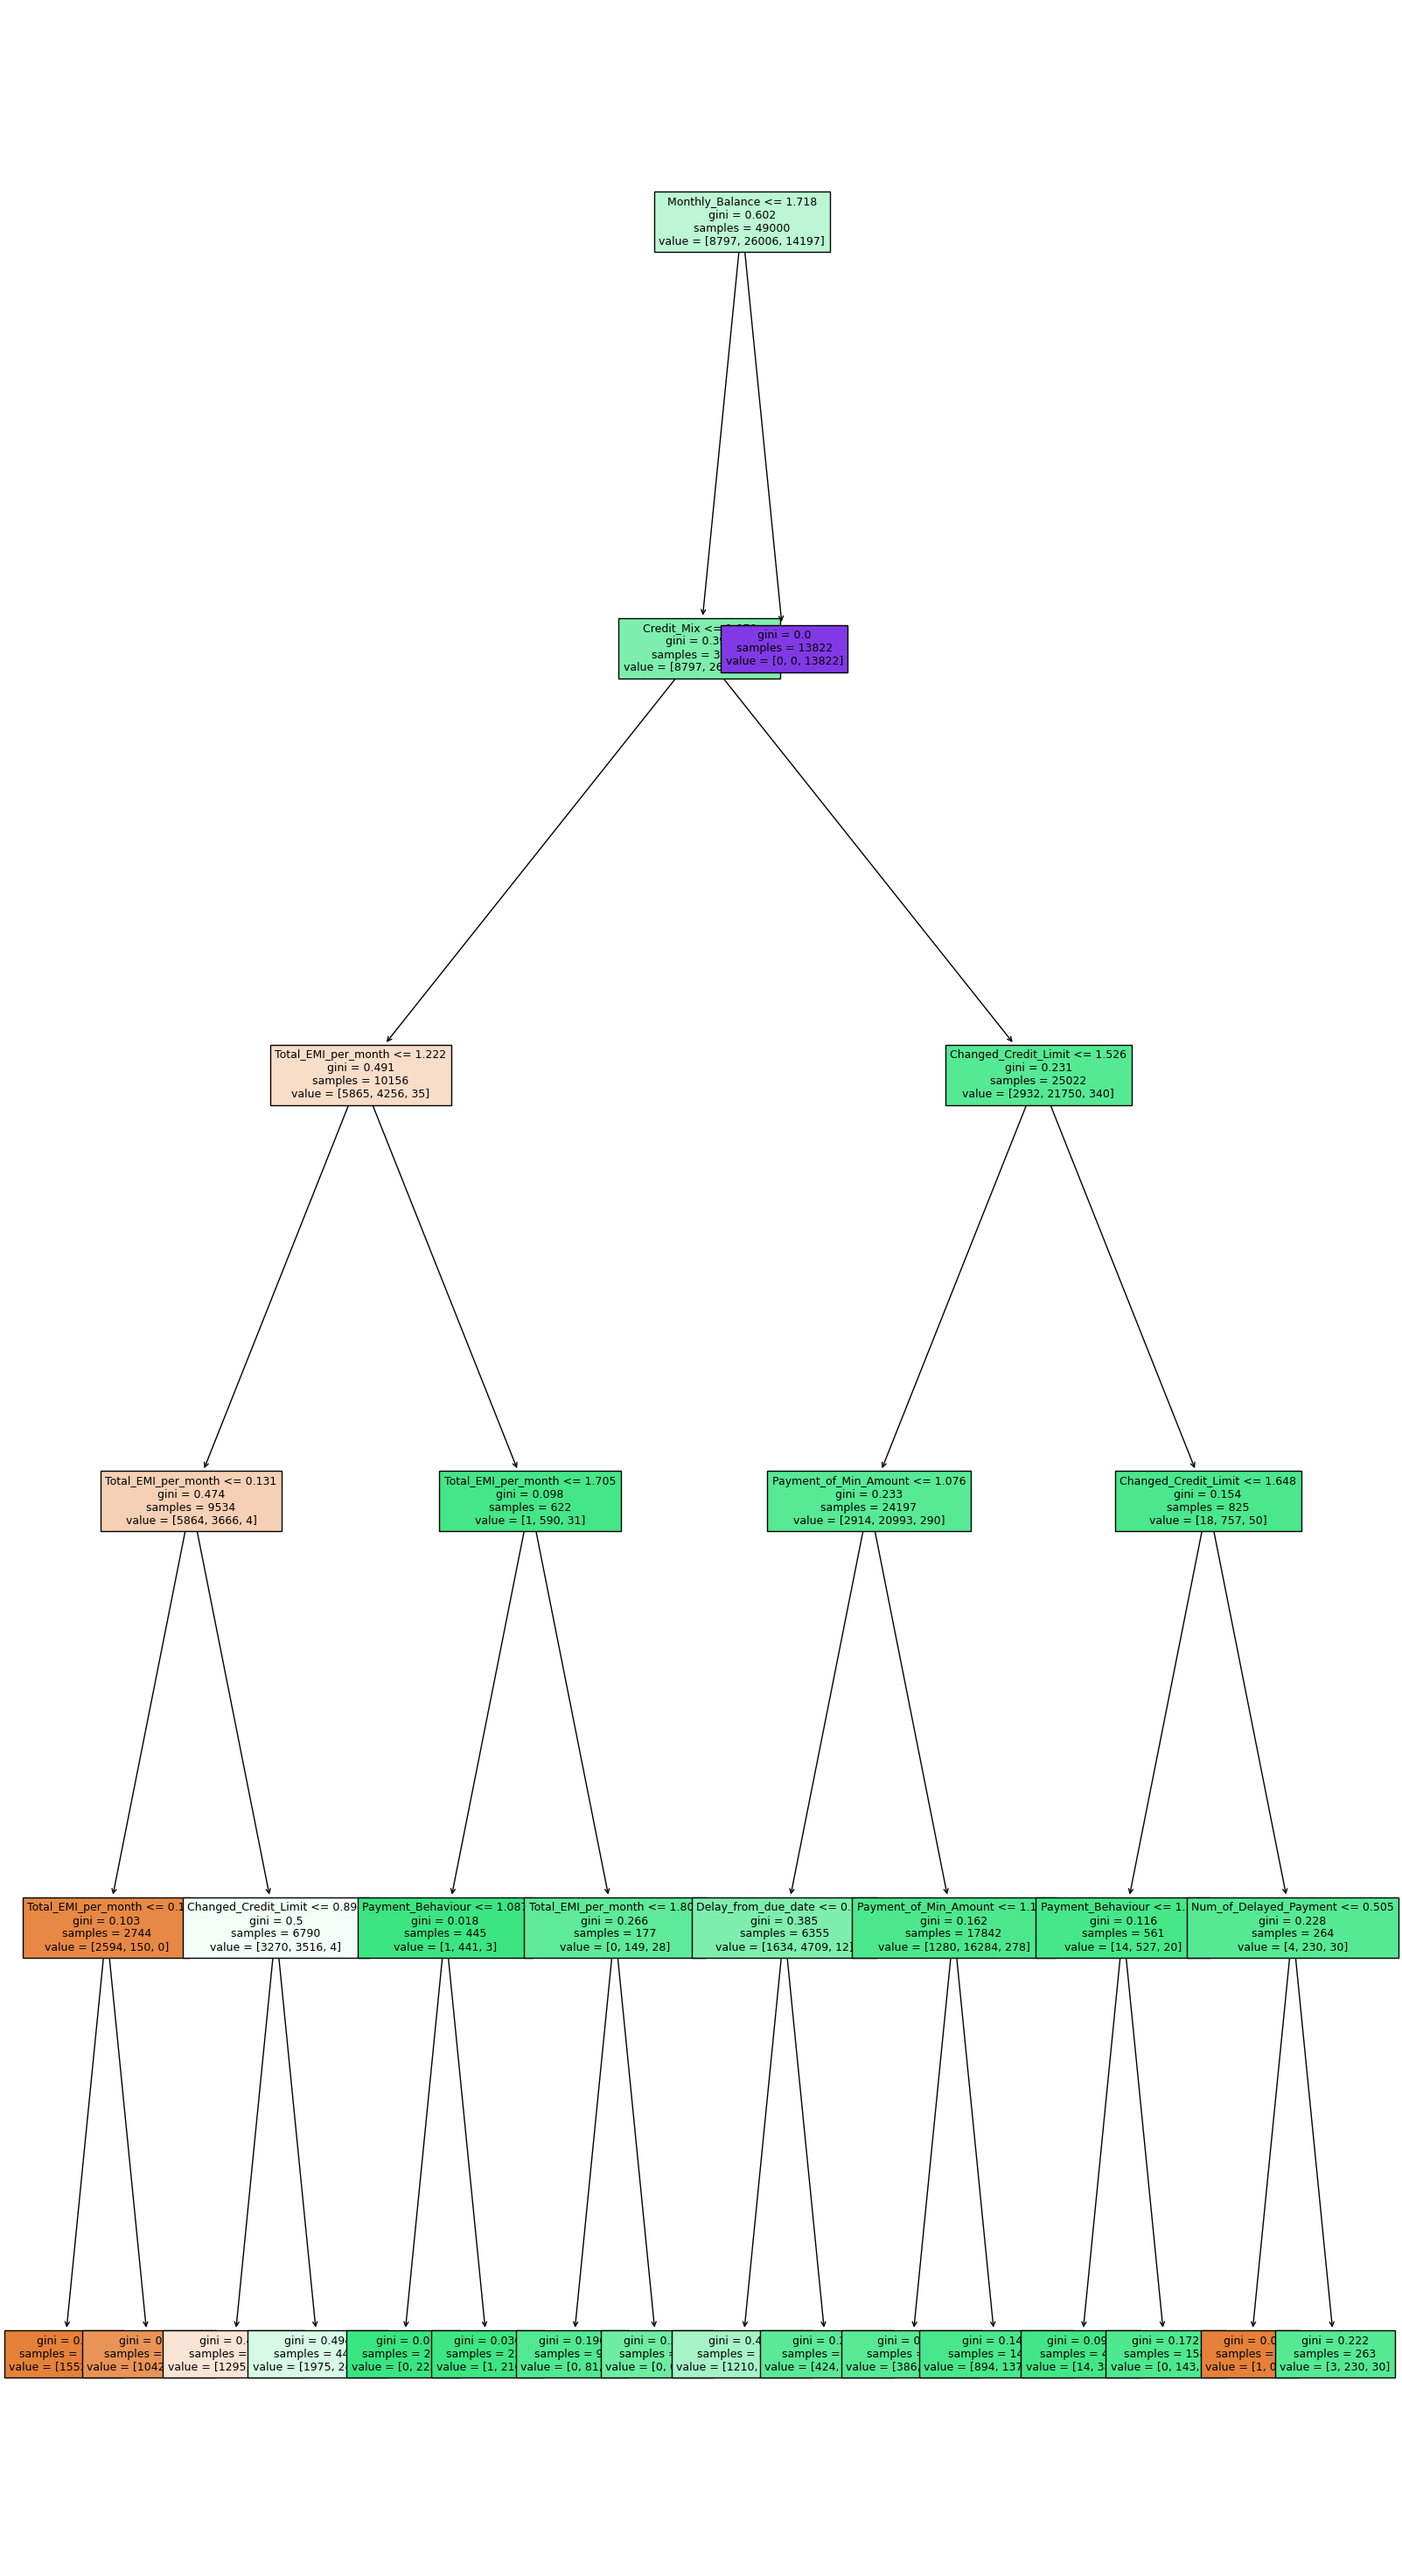

In [ ]:
## Visualize the tree
plt.figure(figsize=(20,38))
out = tree.plot_tree(estimator,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()

## **Observation**
* We used RandomSerchCV to find best hyperparameter of DecisionTreeClassifier
* Here, model perform good on both train and test data
* Recall on training set:  0.8683673469387755
* Recall on test set:  0.8713333333333333
* Precision on training set:  0.8654701564976607
* Precision on test set:  0.8682949086066004

# **Bagging Classifier**

In [ ]:
from sklearn.ensemble  import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
bagging = BaggingClassifier()
bagging.fit(X_train_imputed,y_train)

BaggingClassifier()

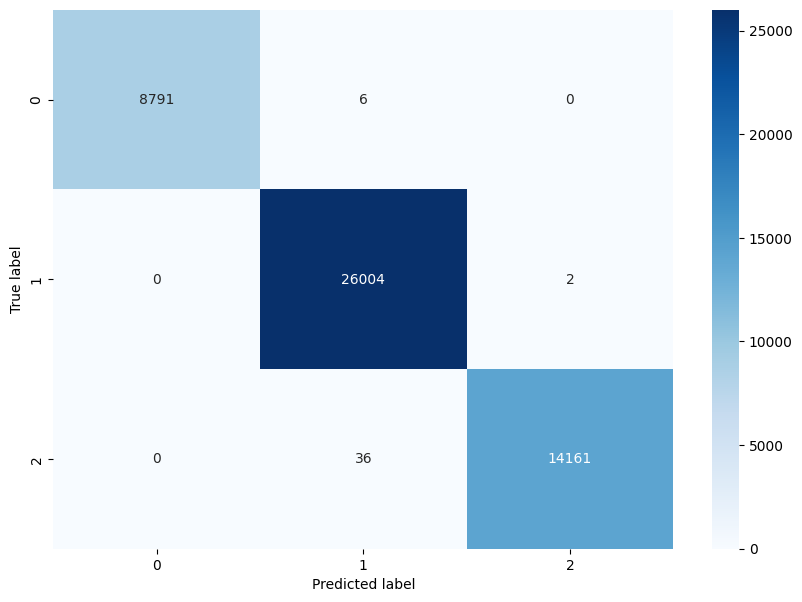

In [ ]:
make_confusion_matrix(bagging,y_train)

In [ ]:
get_recall_precision(bagging)

Accuracy on training set:  0.9991020408163265
Accuracy on test set:  0.9908095238095238
Recall on training set:  0.9991020408163265
Recall on test set:  0.9908095238095238
Precision on training set:  0.9991032591841696
Precision on test set:  0.9908720108507368
F1-score on training set:  0.9991019000853947
F1-score on test set:  0.9908054185227991


In [ ]:
pred_final_test = bagging.predict(X_final_test_imputed)
pred_train_data = bagging.predict(X_train_imputed)
print('recall of train: ',recall_score(y_train,pred_train_data,average='weighted'))
print('recall of final test: ', recall_score(y_final_test,pred_final_test,average= 'weighted'))
print('Precision of train: ',precision_score(y_train,pred_train_data,average= 'weighted'))
print('precision of final test: ',precision_score(y_final_test,pred_final_test,average= 'weighted'))

recall of train:  0.9991020408163265
recall of final test:  0.9911666666666666
Precision of train:  0.9991032591841696
precision of final test:  0.9912207945534481


## **Observation**
* Model is peforming good on both training and testing data
* Model is over train

Lets checks for RandomForestClassifier

# **RandomForest Classifier**
#### Important Details
* What is RandomForestClassifier?
* Ans: **Random Forest Classifier** is a popular ensemble learning algorithm used for classification tasks.Its based on the concept of decision tree,where multiple decision tree are trained on different sub-samples of the datasets and thier predictions are combined to make the final prediction.
 1. **BootStrap Sampling(bagging)**:Random Forest starts by creating multiple decision trees each trained on a random subset of the training data.This process is called is bootstrap sampling.
 2. **Feature Randomness**:In Addition to training each tree on a random subset of the data.Random Forest also selects a random subset of features to consider when splitting each node of the tree.This introduces more randomness into the model and helps to decorrelate the trees.
 3. **Voting**:Once all the trees are trained predictions are made by each individual tree,For classsification tasks,each tree votes for its class label it predicts .The class label with the most votes is chosen as the final prediction.
 * **Effective** because:
   1. **Robustness**:Random Forest is less prone to overfitting compared to individual decision trees because it combines the predictions of multiple trees,each trained on a different subset of the data.
   2. **Handling Imbalanced Data**: Random Forest is a measure of feature importance which can help in understanding the relative importance of different features in making predictions

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train_imputed,y_train)

RandomForestClassifier(random_state=1)

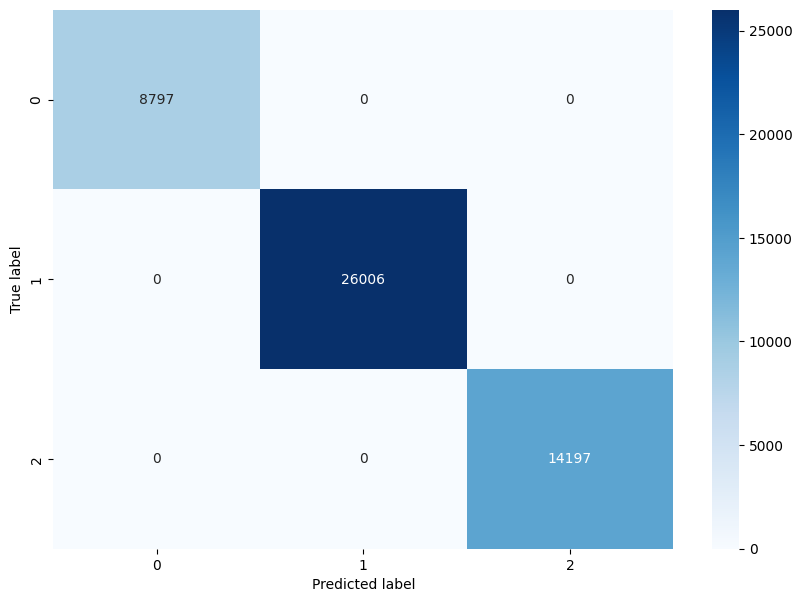

In [ ]:
make_confusion_matrix(rf,y_train)

In [ ]:
get_recall_precision(rf)

Accuracy on training set:  1.0
Accuracy on test set:  0.9910952380952381
Recall on training set:  1.0
Recall on test set:  0.9910952380952381
Precision on training set:  1.0
Precision on test set:  0.9912292381205383
F1-score on training set:  1.0
F1-score on test set:  0.9910881279516631


# Tunning Bagging Classifier

In [ ]:
# Create a base classifier (Decision Tree with class weights)
cl1 = DecisionTreeClassifier(max_depth=3, max_features='log2',min_impurity_decrease=0.0001,random_state=1)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'base_estimator': [cl1],
    'n_estimators': [5, 7, 15, 51, 101],
    'max_features': [0.7, 0.8, 0.9, 1]
}

# Create the BaggingClassifier with default parameters (you can customize them if needed)
bagging_classifier = BaggingClassifier(random_state=1, bootstrap=True)

# Create the RandomizedSearchCV object
bagging_classifier = RandomizedSearchCV(bagging_classifier, param_distributions=param_dist, scoring='recall', cv=5, n_iter=10, random_state=1)

# Fit the RandomizedSearchCV on the training data
bagging_classifier.fit(X_train_imputed,y_train)

RandomizedSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
                   param_distributions={'base_estimator': [DecisionTreeClassifier(max_depth=3,
                                                                                  max_features='log2',
                                                                                  min_impurity_decrease=0.0001,
                                                                                  random_state=1)],
                                        'max_features': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': [5, 7, 15, 51, 101]},
                   random_state=1, scoring='recall')

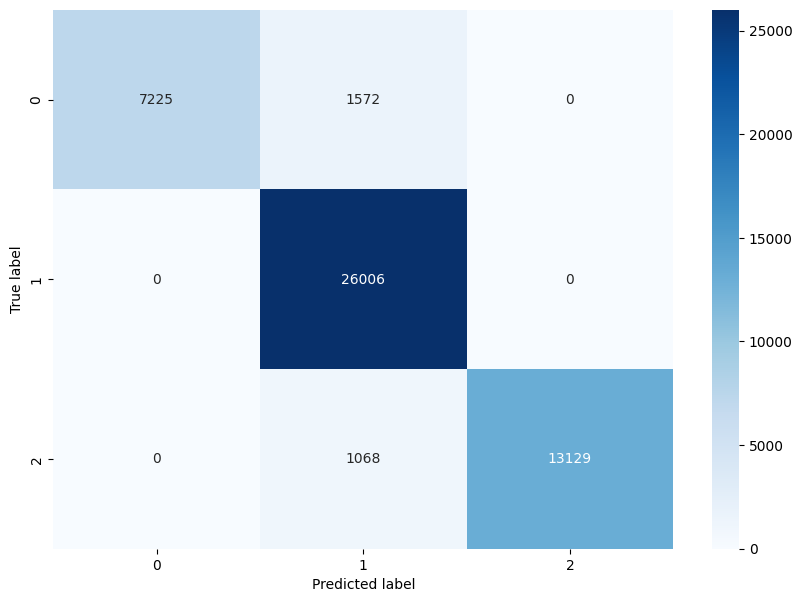

In [ ]:
make_confusion_matrix(bagging_classifier,y_train)

In [ ]:
get_recall_precision(bagging_classifier)

Accuracy on training set:  0.9461224489795919
Accuracy on test set:  0.9448095238095238
Recall on training set:  0.9461224489795919
Recall on test set:  0.9448095238095238
Precision on training set:  0.951087775192462
Precision on test set:  0.9499943954885999
F1-score on training set:  0.9454239655917566
F1-score on test set:  0.9440371925003743


## Observation:
* Model is performing good on both data
* Recall on training set:  0.9461224489795919
* Recall on test set:  0.9448095238095238
* Precision on training set:  0.951087775192462
* Precision on test set:  0.949994395488599

# **Boosting Model**

# **AdaBoost Classifier**

### AdaBoost
AdaBoost stands for Adaptive Boosting. It's a powerful technique that combines multiple weak learners (like decision trees) to create a more accurate and robust ensemble model.


**Number of estimators:**
This controls how many weak learners are used in the ensemble. More estimators can lead to better accuracy, but also longer training time.
                     
**Learning rate:**
This determines how much weight is given to each new model. A lower learning rate can help prevent overfitting, while a higher learning rate can make the model learn faster.
              
**Base estimator:**
This specifies the type of weak learner to use (e.g., decision tree, linear model). Different learners have different strengths and weaknesses, so choosing the right one can impact performance.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train_imputed,y_train)

AdaBoostClassifier()

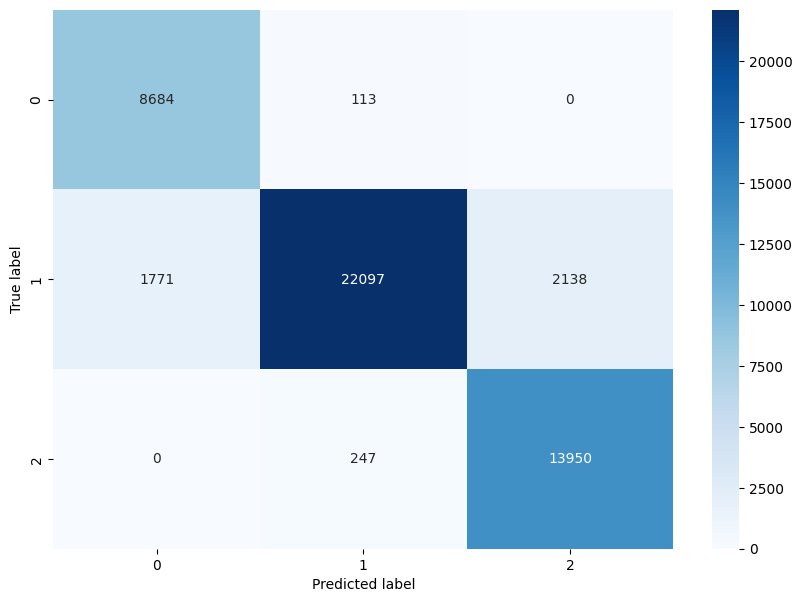

In [ ]:
make_confusion_matrix(ada,y_train)

In [ ]:
get_recall_precision(ada)

Accuracy on training set:  0.9128775510204081
Accuracy on test set:  0.9100952380952381
Recall on training set:  0.9128775510204081
Recall on test set:  0.9100952380952381
Precision on training set:  0.9225767953218309
Precision on test set:  0.9203046127895993
F1-score on training set:  0.9128627337610657
F1-score on test set:  0.9100849942649043


In [ ]:
ada_imp_features =  pd.DataFrame({'Columns': X.columns,'Imortant_Feature': ada.feature_importances_}).sort_values('Imortant_Feature',ascending=False).reset_index()
ada_imp_features

,index,Columns,Imortant_Feature
0,14,Total_EMI_per_month,0.20
1,1,Occupation,0.14
2,2,Monthly_Inhand_Salary,0.12
3,16,Monthly_Balance,0.08
4,6,Delay_from_due_date,0.06
5,0,Age,0.06
6,5,Interest_Rate,0.06
7,4,Num_Credit_Card,0.06
8,7,Num_of_Delayed_Payment,0.04
9,9,Num_Credit_Inquiries,0.04


## **Observation**
* Its perform well on good trining and testing dataset
* Recall on training set:  0.9128775510204081
* Recall on test set:  0.9100952380952381
* Precision on training set:  0.9225767953218309
* Precision on test set:  0.9203046127895993

# **Hyper Parameter tunning on AdaBoost Classifier**

In [ ]:

# Choose the type of classifier.
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10, 100,10),
              'learning_rate': [1, 0.1, 0.5, 0.01]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the Random search
random_obj = RandomizedSearchCV(ab_tuned, parameters, scoring=scorer, cv=5,n_iter=10)
random_obj = random_obj.fit(X_train_imputed, y_train)

# Set the clf to the best combination of parameters
ab_tuned = random_obj.best_estimator_

ab_tuned.fit(X_train_imputed,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=70, random_state=1)

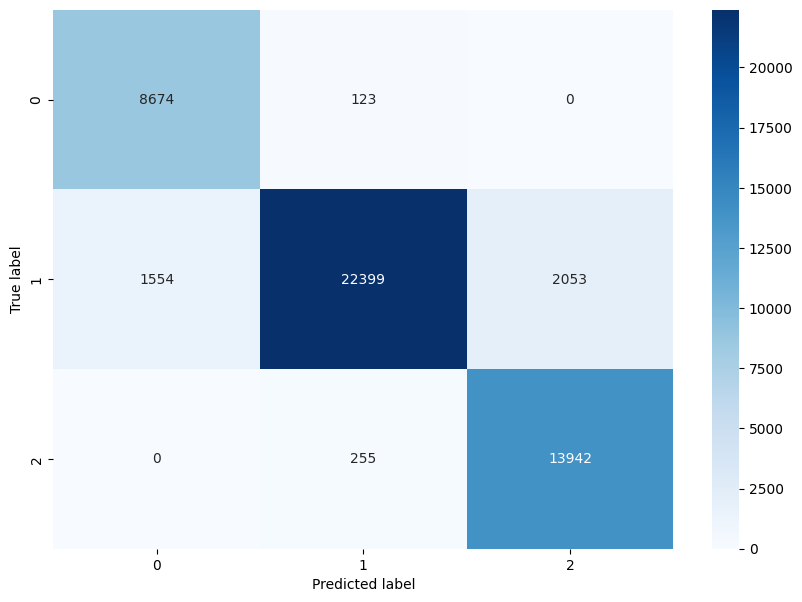

In [ ]:
make_confusion_matrix(ab_tuned,y_train)

In [ ]:
get_recall_precision(ab_tuned)

Accuracy on training set:  0.9186734693877551
Accuracy on test set:  0.9174761904761904
Recall on training set:  0.9186734693877551
Recall on test set:  0.9174761904761904
Precision on training set:  0.926726749663932
Precision on test set:  0.9256642899970192
F1-score on training set:  0.918671567190977
F1-score on test set:  0.9174922871571977


In [ ]:
ab_tuned_imp_features = pd.DataFrame({'Columns': X.columns,'Imortant_Feature': ab_tuned.feature_importances_}).sort_values('Imortant_Feature',ascending=False).reset_index()
ab_tuned_imp_features

,index,Columns,Imortant_Feature
0,1,Occupation,0.171429
1,2,Monthly_Inhand_Salary,0.171429
2,14,Total_EMI_per_month,0.171429
3,16,Monthly_Balance,0.071429
4,5,Interest_Rate,0.071429
5,12,Credit_History_Age,0.042857
6,9,Num_Credit_Inquiries,0.042857
7,0,Age,0.042857
8,6,Delay_from_due_date,0.042857
9,4,Num_Credit_Card,0.042857


# **Observation**
* Accuracy on training set:  0.9186734693877551
* Accuracy on test set:  0.9174761904761904
* Recall on training set:  0.9186734693877551
* Recall on test set:  0.9174761904761904
* Precision on training set:  0.926726749663932
* Precision on test set:  0.9256642899970192
* F1-score on training set:  0.918671567190977
* F1-score on test set:  0.9174922871571977

# **Gradient boosting**
It builds a series of weak learners (usually decision trees) sequentially, where each new learner corrects the errors of the previous one. The final model is an additive combination of these weak learners, and the learning process is guided by the gradient of the loss function.


**Hyperparameters of Gradient Boosting:**

**Learning Rate (or Shrinkage):** How much each team member learns from the mistakes of the previous ones.

**Number of Trees (or n_estimators)**: How many team members (models) we want to train in total.

**Max Depth (or max_depth):** How much each team member can specialize in certain details.

**Subsample:** How much of the training data each team member gets to see, introducing a bit of randomness.

**Min Samples Split (or min_samples_split):** The minimum number of examples needed to teach a new detail.

**Min Samples Leaf (or min_samples_leaf):** The minimum number of examples needed for a specific detail.

**Max Features (or max_features):** How many different things each team member can focus on, adding randomness.

**Loss Function:** What we're trying to improve or minimize during training, like how wrong the team is in its predictions.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gd_estimator = GradientBoostingClassifier(random_state=1)
gd_estimator.fit(X_train_imputed,y_train)

GradientBoostingClassifier(random_state=1)

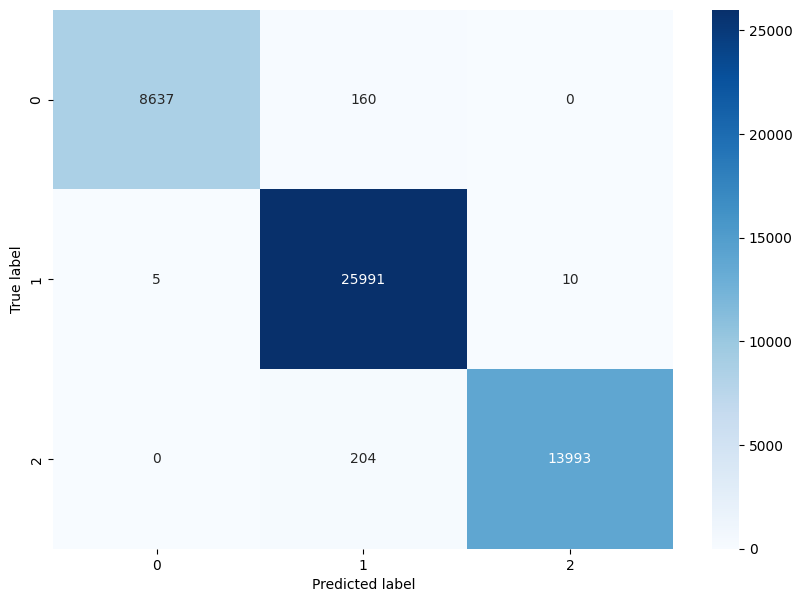

In [ ]:
make_confusion_matrix(gd_estimator,y_train)

In [ ]:
get_recall_precision(gd_estimator)

Accuracy on training set:  0.992265306122449
Accuracy on test set:  0.9907619047619047
Recall on training set:  0.992265306122449
Recall on test set:  0.9907619047619047
Precision on training set:  0.9923590197115656
Precision on test set:  0.9908793840147948
F1-score on training set:  0.992261095885411
F1-score on test set:  0.9907555269820767


# **Hyper Parameter tunning for gradiant Boossting**

In [ ]:
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50, 200, 25),
              'subsample': [0.7, 0.8, 0.9, 1],
              'max_features': [0.7, 0.8, 0.9, 1],
              'max_depth': [3, 5, 7, 10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the randomized grid search
gd_obj = RandomizedSearchCV(gb_tuned, parameters, scoring=scorer, cv=5,n_iter=10)
gd_obj = gd_obj.fit(X_train_imputed, y_train)

# Set the clf to the best combination of parameters
gb_tuned = gd_obj.best_estimator_

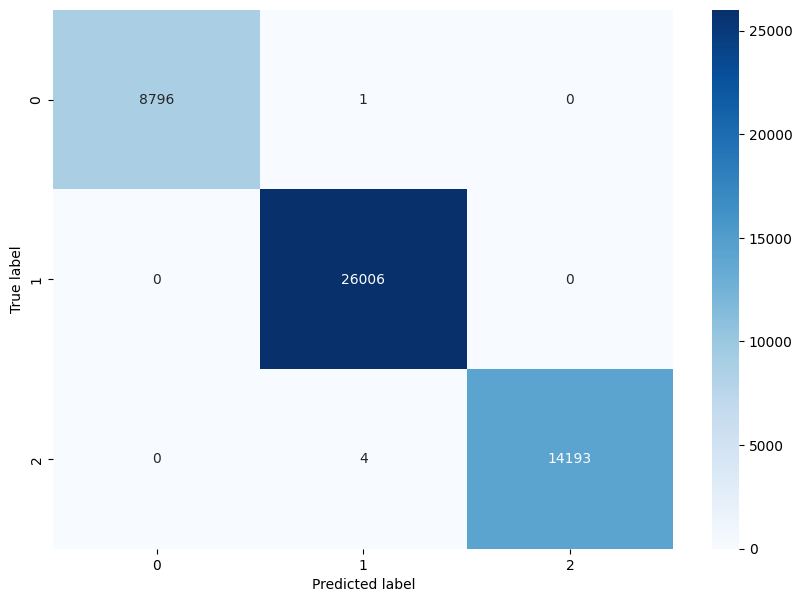

In [ ]:
make_confusion_matrix(gb_tuned,y_train)

In [ ]:
get_recall_precision(gb_tuned)

Accuracy on training set:  0.9998979591836735
Accuracy on test set:  0.9908571428571429
Recall on training set:  0.9998979591836735
Recall on test set:  0.9908571428571429
Precision on training set:  0.9998979787986086
Precision on test set:  0.9909284492466867
F1-score on training set:  0.9998979577570672
F1-score on test set:  0.9908521941965043


# **XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_estimator = XGBClassifier()
xgb_estimator.fit(X_train_imputed,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

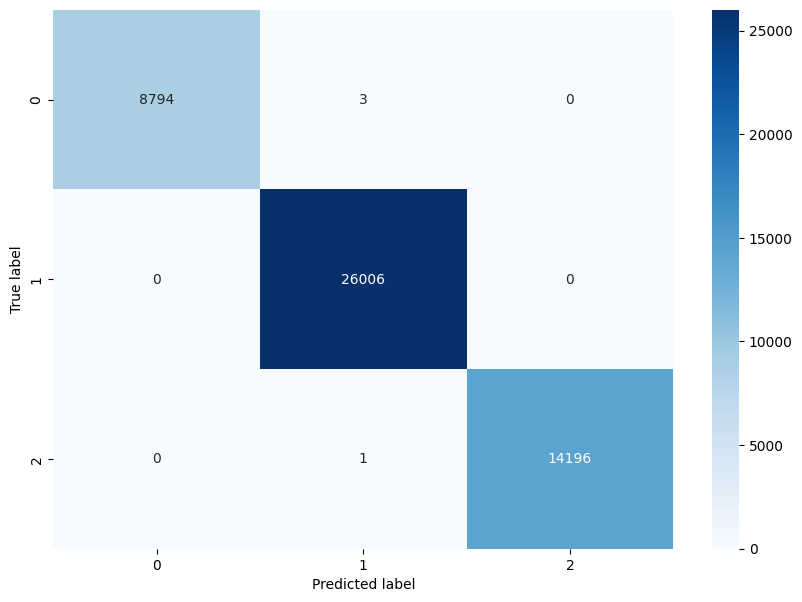

In [ ]:
make_confusion_matrix(xgb_estimator,y_train)

In [ ]:
get_recall_precision(xgb_estimator)

Accuracy on training set:  0.9999183673469387
Accuracy on test set:  0.9910476190476191
Recall on training set:  0.9999183673469387
Recall on test set:  0.9910476190476191
Precision on training set:  0.99991837990098
Precision on test set:  0.9911185550904452
F1-score on training set:  0.9999183649056373
F1-score on test set:  0.9910423160002143


# Hyper Parameter Tunning for XGBoost Classifer

In [ ]:
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'n_estimators': [30,60,90],
    'subsample': [0.8, 0.9, 1.0],
    'gamma':  [0.1, 0.5, 1.0,2,3],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'colsample_bylevel': [0.8, 0.9, 1.0],
    'colsample_by_node': [0.8, 0.9, 1.0],
    'learning_rate': [0.1,0.2,0.5,0.7],
    'scale_pos_weight': [1, 5, 10],
    'max_depth': [3, 4, 5],  # Added max_depth
    'min_child_weight': [1, 2, 3]  # Added min_child_weight
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the randomized grid search
randomized_search_obj = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer, cv=10, n_iter=10, random_state=42)
randomized_search_obj = randomized_search_obj.fit(X_train_imputed, y_train)

# Set the clf to the best combination of parameters
xgb_tuned_randomized = randomized_search_obj.best_estimator_

In [ ]:
xgb_tuned_randomized # n_estimators': [100, 150, 200]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_by_node=1.0, colsample_bylevel=1.0,
              colsample_bynode=None, colsample_bytree=0.9, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=90,
              n_jobs=None, num_parallel_tree=None, ...)

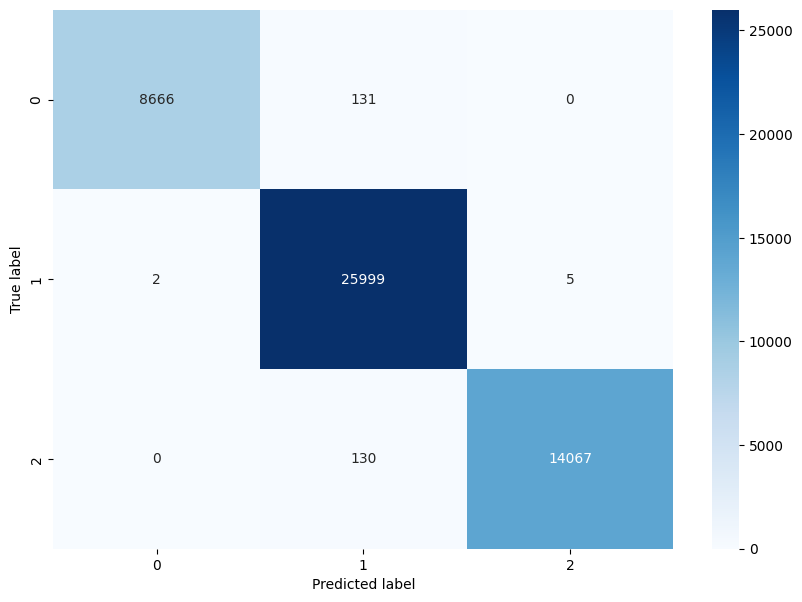

In [ ]:
make_confusion_matrix(xgb_tuned_randomized,y_train)

In [ ]:
get_recall_precision(xgb_tuned_randomized)

Accuracy on training set:  0.9945306122448979
Accuracy on test set:  0.9909523809523809
Recall on training set:  0.9945306122448979
Recall on test set:  0.9909523809523809
Precision on training set:  0.9945806192836579
Precision on test set:  0.9910498804041056
F1-score on training set:  0.9945277867978942
F1-score on test set:  0.9909461581806117


In [ ]:
XGBoosst_tune_feature = pd.DataFrame({'Columns': X.columns,'Imortant_Feature': xgb_tuned_randomized.feature_importances_}).sort_values('Imortant_Feature',ascending=False).reset_index()
XGBoosst_tune_feature

,index,Columns,Imortant_Feature
0,16,Monthly_Balance,0.817595
1,14,Total_EMI_per_month,0.078525
2,10,Credit_Mix,0.063717
3,13,Payment_of_Min_Amount,0.008907
4,15,Payment_Behaviour,0.005975
5,5,Interest_Rate,0.004420
6,4,Num_Credit_Card,0.003185
7,2,Monthly_Inhand_Salary,0.002655
8,8,Changed_Credit_Limit,0.002317
9,11,Credit_Utilization_Ratio,0.001764


# Regulization Techniques

In [ ]:
ridge_model = RidgeClassifier()
ridge_model.fit(X_train_imputed, y_train)

ridge_train_predictions = ridge_model.predict(X_train_imputed)
ridge_test_predictions = ridge_model.predict(X_test_imputed)

ridge_train_accuracy = accuracy_score(ridge_train_predictions, y_train)
ridge_test_accuracy = accuracy_score(ridge_test_predictions, y_test)


print("RidgeClassifier Training Accuracy:", ridge_train_accuracy)
print("RidgeClassifier Test Accuracy:", ridge_test_accuracy)
print("RidgeClassifier Training Precision:", precision_score(ridge_train_predictions, y_train,average='weighted'))
print("RidgeClassifier Test Precision:", precision_score(ridge_test_predictions, y_test,average='weighted'))

RidgeClassifier Training Accuracy: 0.9005102040816326
RidgeClassifier Test Accuracy: 0.9024285714285715
RidgeClassifier Training Precision: 0.9150082915716073
RidgeClassifier Test Precision: 0.9171330824431165


In [ ]:
print("RidgeClassifier Training Accuracy:", ridge_train_accuracy)
print("RidgeClassifier Test Accuracy:", ridge_test_accuracy)
print("RidgeClassifier Training Precision:", precision_score(ridge_train_predictions, y_train,average='weighted'))
print("RidgeClassifier Test Precision:", precision_score(ridge_test_predictions, y_test,average='weighted'))
print("RidgeClassifier Training Recall:", recall_score(ridge_train_predictions, y_train,average='weighted'))
print("RidgeClassifier Test Recall:", recall_score(ridge_test_predictions, y_test,average='weighted'))

RidgeClassifier Training Accuracy: 0.9005102040816326
RidgeClassifier Test Accuracy: 0.9024285714285715
RidgeClassifier Training Precision: 0.9150082915716073
RidgeClassifier Test Precision: 0.9171330824431165
RidgeClassifier Training Recall: 0.9005102040816326
RidgeClassifier Test Recall: 0.9024285714285715


In [ ]:
get_recall_precision(ridge_model)

Accuracy on training set:  0.9005102040816326
Accuracy on test set:  0.9024285714285715
Recall on training set:  0.9005102040816326
Recall on test set:  0.9024285714285715
Precision on training set:  0.9021551785077664
Precision on test set:  0.9040443614804078
F1-score on training set:  0.8968059530916469
F1-score on test set:  0.8986694221312753


# Testing on final data

In [ ]:
# Function to check recall and precison score

def final_score(model):
  '''
  model: classifier to predict values of X

  '''

  pred_train = model.predict(X_train_imputed)  # Predict on training set
  pred_test = model.predict(X_final_test_imputed)  # Predict on test set
  print("Accuracy on training set: ", metrics.accuracy_score(y_train, pred_train))
  print("Accuracy on test set: ", metrics.accuracy_score(y_final_test, pred_test))
  print("Recall on training set: ", metrics.recall_score(y_train, pred_train,average='weighted'))
  print("Recall on test set: ", metrics.recall_score(y_final_test, pred_test,average='weighted'))
  print("Precision on training set: ", metrics.precision_score(y_train, pred_train,average='weighted'))
  print("Precision on test set: ", metrics.precision_score(y_final_test, pred_test,average='weighted'))
  print("F1-score on training set: ", metrics.f1_score(y_train, pred_train,average='weighted'))
  print("F1-score on test set: ", metrics.f1_score(y_final_test, pred_test,average='weighted'))


In [ ]:
# Logistic Model
final_score(logistic_model)

Accuracy on training set:  0.5308163265306123
Accuracy on test set:  0.5333
Recall on training set:  0.5308163265306123
Recall on test set:  0.5333
Precision on training set:  0.3651773141921525
Precision on test set:  0.3740331745615709
F1-score on training set:  0.37046637804322097
F1-score on test set:  0.37357942787423826


In [ ]:
# Decision Tree
final_score(model)

Accuracy on training set:  1.0
Accuracy on test set:  0.985
Recall on training set:  1.0
Recall on test set:  0.985
Precision on training set:  1.0
Precision on test set:  0.9850095581190709
F1-score on training set:  1.0
F1-score on test set:  0.9850008967293576


In [ ]:
# Decision Tree Prepruning
final_score(estimator)

Accuracy on training set:  0.8128163265306122
Accuracy on test set:  0.8153666666666667
Recall on training set:  0.8128163265306122
Recall on test set:  0.8153666666666667
Precision on training set:  0.6820903266303964
Precision on test set:  0.6853026259154319
F1-score on training set:  0.7370300162940465
F1-score on test set:  0.740168547972433


In [ ]:
# Random Forest
final_score(rf)

Accuracy on training set:  1.0
Accuracy on test set:  0.9909666666666667
Recall on training set:  1.0
Recall on test set:  0.9909666666666667
Precision on training set:  1.0
Precision on test set:  0.991099615170263
F1-score on training set:  1.0
F1-score on test set:  0.9909592919472615


In [ ]:
# Bagging
final_score(bagging)

Accuracy on training set:  0.9991020408163265
Accuracy on test set:  0.9911666666666666
Recall on training set:  0.9991020408163265
Recall on test set:  0.9911666666666666
Precision on training set:  0.9991032591841696
Precision on test set:  0.9912207945534481
F1-score on training set:  0.9991019000853947
F1-score on test set:  0.9911625567785165


In [ ]:
# Bagging Tune
final_score(bagging_classifier)

Accuracy on training set:  0.9461224489795919
Accuracy on test set:  0.9455
Recall on training set:  0.9461224489795919
Recall on test set:  0.9455
Precision on training set:  0.951087775192462
Precision on test set:  0.9505443608254617
F1-score on training set:  0.9454239655917566
F1-score on test set:  0.9447293127651989


In [ ]:
# AdaBoost
final_score(ada)

Accuracy on training set:  0.9128775510204081
Accuracy on test set:  0.9160666666666667
Recall on training set:  0.9128775510204081
Recall on test set:  0.9160666666666667
Precision on training set:  0.9225767953218309
Precision on test set:  0.9252114906379213
F1-score on training set:  0.9128627337610657
F1-score on test set:  0.9160973004216262


In [ ]:
# AdaBoost Tune
final_score(ab_tuned)

Accuracy on training set:  0.9186734693877551
Accuracy on test set:  0.9213
Recall on training set:  0.9186734693877551
Recall on test set:  0.9213
Precision on training set:  0.926726749663932
Precision on test set:  0.9289134364044074
F1-score on training set:  0.918671567190977
F1-score on test set:  0.9213373909803385


In [ ]:
# Gradiant
final_score(gd_estimator)

Accuracy on training set:  0.992265306122449
Accuracy on test set:  0.9909666666666667
Recall on training set:  0.992265306122449
Recall on test set:  0.9909666666666667
Precision on training set:  0.9923590197115656
Precision on test set:  0.9910812327284435
F1-score on training set:  0.992261095885411
F1-score on test set:  0.9909599530088657


In [ ]:
# Gradiant tune
final_score(gb_tuned)

Accuracy on training set:  0.9998979591836735
Accuracy on test set:  0.9908333333333333
Recall on training set:  0.9998979591836735
Recall on test set:  0.9908333333333333
Precision on training set:  0.9998979787986086
Precision on test set:  0.9909019939179151
F1-score on training set:  0.9998979577570672
F1-score on test set:  0.9908278124507218


In [ ]:
# XGBoost
final_score(xgb_estimator)

Accuracy on training set:  0.9999183673469387
Accuracy on test set:  0.9908666666666667
Recall on training set:  0.9999183673469387
Recall on test set:  0.9908666666666667
Precision on training set:  0.99991837990098
Precision on test set:  0.9909448192426472
F1-score on training set:  0.9999183649056373
F1-score on test set:  0.9908609843236287


In [ ]:
# XGBoost tune
final_score(xgb_tuned_randomized)

Accuracy on training set:  0.9945306122448979
Accuracy on test set:  0.9909666666666667
Recall on training set:  0.9945306122448979
Recall on test set:  0.9909666666666667
Precision on training set:  0.9945806192836579
Precision on test set:  0.9910629569770145
F1-score on training set:  0.9945277867978942
F1-score on test set:  0.9909602120539354


In [ ]:
# Ridge model
final_score(ridge_model)

Accuracy on training set:  0.9005102040816326
Accuracy on test set:  0.9009333333333334
Recall on training set:  0.9005102040816326
Recall on test set:  0.9009333333333334
Precision on training set:  0.9021551785077664
Precision on test set:  0.9021643933400708
F1-score on training set:  0.8968059530916469
F1-score on test set:  0.8971069053582604


In [ ]:
X.columns

Index(['Age', 'Occupation', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [ ]:
Model_Summary = pd.DataFrame({'Model':['Logistic','Decision_Tree','Decision_Tune','Random_forest','Bagging','Bagging_tune','AdaBoost','AdaBoost_tune','GradiantBoosting','GradiantBoost_tune','XGBoost','XGboost_tune','Ridge'],
              'Accuracy_Score_Train':[0.5308,1.0,0.8181,1.0,0.9991,0.9461,0.9128,0.9186,0.9922,0.9998,0.9999,0.9994,0.9000],
              'Accuracy_Score_Test': [0.5333,0.985,0.8153,0.9909,0.911,0.9455,0.9160,0.9213,0.9909,0.9908,0.9908,0.9909,0.9009],
              'Recall_Train': [0.5308,1.0,0.8128,1.0,0.9991,0.9461,0.9128,0.9186,0.9922,0.999,0.9999,0.9995,0.9000],
              'Recall_Test': [0.5333,0.985,0.8153,0.9909,0.9911,0.9455,0.9160,0.9213,0.9909,0.9908,0.9908,0.9909,0.9009],
              'Precision_Train': [0.3651,1.0,0.6820,1.0,0.9991,0.9512,0.9225,0.9267,0.9923,0.999,0.9999,0.9945,0.9021],
              'Precision_Test': [0.3740,0.985,0.6853,0.9910,0.9812,0.9505,0.9252,0.9289,0.9910,0.9909,0.9909,0.9910,0.9021],
              'F1_Train': [0.3704,1.0,0.7370,1.0,0.9991,0.9454,0.9128,0.9186,0.9922,0.999,0.9992,0.9945,0.8963],
              'F1_Test': [0.3735,0.9852,0.7401,0.9909,0.9914,0.9447,0.9160,0.9213,0.9909,0.9908,0.9908,0.9909,0.8971]})

In [ ]:
Model_Summary

,Model,Accuracy_Score_Train,Accuracy_Score_Test,Recall_Train,Recall_Test,Precision_Train,Precision_Test,F1_Train,F1_Test
0,Logistic,0.5308,0.5333,0.5308,0.5333,0.3651,0.3740,0.3704,0.3735
1,Decision_Tree,1.0000,0.9850,1.0000,0.9850,1.0000,0.9850,1.0000,0.9852
2,Decision_Tune,0.8181,0.8153,0.8128,0.8153,0.6820,0.6853,0.7370,0.7401
3,Random_forest,1.0000,0.9909,1.0000,0.9909,1.0000,0.9910,1.0000,0.9909
4,Bagging,0.9991,0.9110,0.9991,0.9911,0.9991,0.9812,0.9991,0.9914
5,Bagging_tune,0.9461,0.9455,0.9461,0.9455,0.9512,0.9505,0.9454,0.9447
6,AdaBoost,0.9128,0.9160,0.9128,0.9160,0.9225,0.9252,0.9128,0.9160
7,AdaBoost_tune,0.9186,0.9213,0.9186,0.9213,0.9267,0.9289,0.9186,0.9213
8,GradiantBoosting,0.9922,0.9909,0.9922,0.9909,0.9923,0.9910,0.9922,0.9909
9,GradiantBoost_tune,0.9998,0.9908,0.9990,0.9908,0.9990,0.9909,0.9990,0.9908


* Here **AdaBoost with hyperparameter tunning** is our final model it perform good as compare to other models.
* Some of models are overfitting to data.It can be train on every datapoints.
* Model like Decision tree with hyperparameter tunnig, Bagging with tunnig, adaBoost with tunning, are performing good. we algo go for this model as final model
* Logestic model is not performming well on both on train and final test data. It is underfitting. This happen due to outliers in our dataset.


In [ ]:
ada_imp_features.head()

,index,Columns,Imortant_Feature
0,14,Total_EMI_per_month,0.20
1,1,Occupation,0.14
2,2,Monthly_Inhand_Salary,0.12
3,16,Monthly_Balance,0.08
4,6,Delay_from_due_date,0.06


<font color = "blue" size = 5> Here are some business strategies based on top features of model </font>

**1.  Total EMI per Month:**

* **Flexible EMI Plans:** Offer customized EMI plans based on individual financial capabilities. Consider lower EMIs for customers with lower monthly in-hand salaries.
* **Targeted Marketing:** Develop targeted marketing campaigns for different income groups. Highlight EMI flexibility and affordability.

**2.Occupation:**
* **Segmented Services:** Tailor services based on occupation. For example:
   - - For salaried professionals: Offer credit cards with cashback on utility bills.
   - - For self-employed individuals: Provide credit cards with business-related benefits.
* **Industry-Specific Offers:** Collaborate with industry-specific partners (e.g., travel agencies, restaurants) to provide exclusive offers.

**3.Monthly In-hand Salary:**
* **Salary-Linked Credit Limits:** Set credit limits based on monthly income. Higher income individuals can have higher credit limits.
* **Timely Alerts:** Send alerts when credit card usage approaches a certain percentage of the monthly salary.

**4.Monthly Balance:**
* **Balance Management Tips:** Educate customers on maintaining a healthy monthly balance. Offer tips on budgeting and saving.
* **Reward for Maintaining Balance:** Consider loyalty points or cashback for customers who consistently maintain a positive balance.

**5. Delay from Due Date:**
* **Timely Payment Reminders:** Implement automated reminders for due dates. Encourage customers to pay on time to avoid penalties.
* **Grace Periods:** Offer a grace period for late payments without affecting credit scores.

# Conclusion
In this credit card score prediction project, we explored various classification models and identified AdaBoost, Decision Tree, Bagging, and Ridge Regression as the top performers after rigorous hyperparameter tuning. These models demonstrated high accuracy and generalization, while some others showed signs of overfitting. The use of ensemble methods proved effective in improving overall model performance. The project highlights the importance of careful model selection and tuning for accurate creditworthiness predictions, with ethical considerations at the forefront when dealing with sensitive financial data